In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


https://www.uschina.org/reports/us-exports/national

# Load the Data

In [0]:
import os
os.chdir('/content/gdrive/My Drive/data_vs_2019')

In [0]:
# read all data sets

export_china = pd.read_csv('DATA_Exports_to_China.csv') # export to china
import_china = pd.read_csv('DATA_Imports_from_China.csv') # import from china
export_world = pd.read_csv('DATA_Exports_to_World.csv') # export to world

ppi = pd.read_csv('PPIACO.csv') # producer price index
gdp_2018 = pd.read_excel('qgdpstate_0519.xlsx', sheet_name='Table 3', skiprows=4, usecols=[0, 5, 6, 7, 8]) # state gdp
trade_data = pd.read_excel('US_trade_data.xlsx') # US china trade from 1985
election = pd.read_excel('2016_election_result.xlsx') # 2016 presidential election

# Data Cleaning and Preparation

In [0]:
export_china.head()

,State,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,UNITED STATES,13117677381,16253029349,19234827272,22127790292,28367942859,34427772456,41192010123,53673008343,62936891576,69732837543,69496678611,91911080944,104121523635,110516615672,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641
1,Texas,899734807,1452319128,1577843301,2051551556,3057698697,4461433588,4944880580,6641463792,8278906029,8421576434,8906958887,10274197566,10954394475,10305009328,10847291403,10918892470,11502315456,10765409480,16418682453,16586874848
2,California,2394723120,3546020626,4676055993,4482780949,5442742319,6846569292,7821342315,9970700069,10566024437,10981739113,9744452187,12474252241,14216541966,13969451382,16295189362,16068569630,14384346130,14322970762,16433104400,16345090150
3,Washington,2040480542,1900659005,2928721420,3922748622,3269109238,2783827315,4288361119,5281905470,7311238669,8309842343,9113475809,10305016874,11238767551,14156985285,16710775729,20693342014,19483177883,16122645413,17967076472,16001404764
4,South Carolina,139021827,127140423,171983525,236506694,286549882,482423397,622384132,702637655,623534970,790227383,867201660,2156854999,3004731641,3250160210,4878636556,4229925705,4435608205,6433564824,6230142094,5636999846


In [0]:
import_china.head()

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,UNITED STATES,337772627823,296373883488,364952633595,399371232631,425619082637,440430019592,468474894856,483201655364,462542004554,505469954379,539503427742
1,California,98676475455,89251843559,113378385712,120120866257,127756755582,130447509147,137888958470,143635674020,144023326871,159142192980,161186708150
2,Texas,31906468250,27134209550,31594753265,36357659719,40697443727,42830763037,45507968503,40979561114,36637861421,42684392695,44494985568
3,Illinois,19951675470,17835899353,21086507354,22974811816,27799035920,25784321072,29503953009,31242237068,30207700623,31994184247,40883035544
4,Tennessee,14111400176,13182123812,16405189747,20281193448,20579923241,22417808393,25390043223,27189762176,23652310832,23731339360,26605144754


In [0]:
export_world.head()

,State,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,UNITED STATES,692820620412,780418627647,731025906239,693103192211,724770982676,814874653655,901081812545,1025967497363,1148198722191,1287441996730,1056042963028,1278494525839,1482507755226,1545820839892,1578516879950,1621873792910,1503328349746,1451023529686,1546272961061,1664055580908
1,Texas,83177475704,103865689486,94995266011,95427206268,98920252232,117403604389,129346156716,150890067958,168228620315,192221780916,162994740450,206992356499,251104278477,264664928203,277715515839,285559318623,248780410089,231310075313,264541375151,315447759163
2,California,97920078823,119640423626,106776962952,92177510782,93906331503,110143572288,116689901804,127770793810,134318906761,144805748349,120079965765,143208226608,159421393886,161757310648,168191551560,173868587862,165360377800,163438922625,172012424917,178404767473
3,New York,37067481480,42845956538,42172061887,37757072501,40144340162,45638715833,51840964871,59131681664,71115801477,81385735231,58743030056,69684943969,84999347161,81337507054,86407154917,88834326287,83124545673,76690176622,77914558985,81487255805
4,Washington,36730711384,32214701427,34928533081,34740516705,35400898941,29609580934,33078176892,42390603185,52089477068,54498049919,51850856743,53345329885,64800272158,75654307226,81629977930,90558268785,86374679575,79553463482,76413737305,77700205691


In [0]:
ppi.head()

,DATE,PPIACO
0,1985-01-01,103.4
1,1985-02-01,103.3
2,1985-03-01,103.1
3,1985-04-01,103.3
4,1985-05-01,103.5


In [0]:
# transfer to year
ppi['year'] = ppi.DATE.str[:4].astype(int)

In [0]:
ppi_year = ppi.groupby('year').PPIACO.mean()
ppi_year

year
1985    103.150000
1986    100.166667
1987    102.808333
1988    106.941667
1989    112.241667
1990    116.291667
1991    116.533333
1992    117.191667
1993    118.908333
1994    120.450000
1995    124.758333
1996    127.683333
1997    127.600000
1998    124.433333
1999    125.475000
2000    132.741667
2001    134.191667
2002    131.116667
2003    138.125000
2004    146.675000
2005    157.400000
2006    164.750000
2007    172.658333
2008    189.591667
2009    172.908333
2010    184.733333
2011    201.050000
2012    202.158333
2013    203.408333
2014    205.316667
2015    190.441667
2016    185.375000
2017    193.533333
2018    201.950000
2019    200.125000
Name: PPIACO, dtype: float64

In [0]:
# calculate ppi based on 2018 ppi = 1

ppi_year_2018 = ppi_year/ppi_year.loc[2018,]
ppi_year_2018 = ppi_year_2018.to_frame()
ppi_year_2018.reset_index(inplace=True)
ppi_year_2018.rename(columns={'year':'Year'}, inplace=True)
ppi_year_2018

,Year,PPIACO
0,1985,0.510770
1,1986,0.495997
2,1987,0.509078
3,1988,0.529545
4,1989,0.555789
5,1990,0.575844
6,1991,0.577041
7,1992,0.580300
8,1993,0.588801
9,1994,0.596435


In [0]:
#prepare the gdp data

gdp_2018.columns = ['State', 'Q1', 'Q2', 'Q3', 'Q4']
gdp_2018 = gdp_2018.iloc[:-4, ]
gdp_2018 = gdp_2018.iloc[1:, ]
gdp_2018['region'] = 'Far West'
gdp_2018.loc[:8, 'region'] = 'New England'
gdp_2018.loc[8:15, 'region'] = 'Mideast'
gdp_2018.loc[15:21,'region'] = 'Great Lakes'
gdp_2018.loc[21:29, 'region'] = 'Plains'
gdp_2018.loc[29:42, 'region'] = 'Southeast'
gdp_2018.loc[42:47, 'region'] = 'Southwest'
gdp_2018.loc[47:53, 'region'] = 'Rocky Mountain'
gdp_2018 = gdp_2018[~gdp_2018.State.isin(['New England ', 'Mideast ', 'Great Lakes ', 'Plains ', 'Southeast ', 'Southwest ', 'Rocky Mountain ', 'Far West'])]
gdp_2018.reset_index(inplace=True, drop=True)
gdp_2018['gdp'] = gdp_2018.eval('Q1 + Q2 + Q3 + Q4')/4
gdp_2018.State = gdp_2018.State.str.strip() # remove the white space
gdp_2018


,State,Q1,Q2,Q3,Q4,region,gdp
0,Connecticut,270268.0,269863.0,276934.0,279653.0,New England,274179.50
1,Maine,63173.0,64082.0,64798.0,65349.0,New England,64350.50
2,Massachusetts,558137.0,565224.0,570024.0,575635.0,New England,567255.00
3,New Hampshire,83566.0,84035.0,85201.0,86046.0,New England,84712.00
4,Rhode Island,60503.0,61432.0,60807.0,61341.0,New England,61020.75
5,Vermont,33193.0,33760.0,33794.0,34154.0,New England,33725.25
6,Delaware,73168.0,74104.0,76084.0,76537.0,Mideast,74973.25
7,District of Columbia,137894.0,138995.0,141729.0,142502.0,Mideast,140280.00
8,Maryland,406765.0,413154.0,413990.0,417776.0,Mideast,412921.25
9,New Jersey,613929.0,622802.0,627955.0,634721.0,Mideast,624851.75


In [0]:
trade_data_china = trade_data.loc[trade_data.CTYNAME == 'China', ['year', 'IYR', 'EYR']]
trade_data_china.reset_index(inplace=True, drop=True)
trade_data_china.columns = ['year', 'Imports', 'Exports']

In [0]:
trade_data_china

,year,Imports,Exports
0,1985,3861.700000,3855.700000
1,1986,4771.000000,3106.300000
2,1987,6293.600000,3497.300000
3,1988,8510.900000,5021.600000
4,1989,11989.700000,5755.400000
5,1990,15237.400000,4806.400000
6,1991,18969.200000,6278.200000
7,1992,25727.500000,7418.500000
8,1993,31539.900000,8762.900000
9,1994,38786.800000,9281.700000


# Import - Export 

In [0]:
election.head()

,State,Party
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democratic


In [0]:
export_china.head()

,State,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,UNITED STATES,13117677381,16253029349,19234827272,22127790292,28367942859,34427772456,41192010123,53673008343,62936891576,69732837543,69496678611,91911080944,104121523635,110516615672,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641
1,Texas,899734807,1452319128,1577843301,2051551556,3057698697,4461433588,4944880580,6641463792,8278906029,8421576434,8906958887,10274197566,10954394475,10305009328,10847291403,10918892470,11502315456,10765409480,16418682453,16586874848
2,California,2394723120,3546020626,4676055993,4482780949,5442742319,6846569292,7821342315,9970700069,10566024437,10981739113,9744452187,12474252241,14216541966,13969451382,16295189362,16068569630,14384346130,14322970762,16433104400,16345090150
3,Washington,2040480542,1900659005,2928721420,3922748622,3269109238,2783827315,4288361119,5281905470,7311238669,8309842343,9113475809,10305016874,11238767551,14156985285,16710775729,20693342014,19483177883,16122645413,17967076472,16001404764
4,South Carolina,139021827,127140423,171983525,236506694,286549882,482423397,622384132,702637655,623534970,790227383,867201660,2156854999,3004731641,3250160210,4878636556,4229925705,4435608205,6433564824,6230142094,5636999846


## Data pre-processing

In [0]:
# data tidying
export_china_melt = export_china.melt(id_vars = 'State', var_name = 'Year' , value_name = 'export') 
import_china_melt = import_china.melt(id_vars = 'State', var_name = 'Year' , value_name = 'import') 
export_world_melt = export_world.melt(id_vars = 'State', var_name = 'Year' , value_name = 'export') 




# normalization
trade_china_ = pd.merge(export_china_melt, import_china_melt, how = 'inner', on = ['State', 'Year'])
trade_china_.Year = trade_china_.Year.astype('int')

trade_world_ = export_world_melt
trade_world_.Year = trade_world_.Year.astype('int')




ppi_year_2018_index_year = ppi_year_2018.set_index('Year')

trade_china = trade_china_.assign(
    export_normalized = lambda x: (x[['export']] / ppi_year_2018_index_year.loc[x['Year']].values) /1e6,
    import_normalized = lambda x: (x[['import']] / ppi_year_2018_index_year.loc[x['Year']].values) /1e6
)


trade_world = trade_world_.assign(
    export_normalized = lambda x: (x[['export']] / ppi_year_2018_index_year.loc[x['Year']].values)/1e6, 
    
)


# data tidying
trade_china_tidy = trade_china.melt(id_vars = ['State', 'Year'], value_vars = ['export_normalized', 'import_normalized'], var_name = 'trade_type', value_name = 'Dollars')
trade_world_tidy = trade_world.melt(id_vars = ['State', 'Year'], value_vars = ['export_normalized'], var_name = 'trade_type', value_name = 'Dollars')


## Plotting with altair

Selected States by Top Export
<br>
**Change Export to the Same Scale as Import**
**Try log scale**

In [0]:
top10_states = list(gdp_2018.sort_values('gdp', ascending=False).State.iloc[:10])
top10_states

['California',
 'Texas',
 'New York',
 'Florida',
 'Illinois',
 'Pennsylvania',
 'Ohio',
 'New Jersey',
 'Georgia',
 'Massachusetts']

In [0]:
trade_china_tidy.head()

,State,Year,trade_type,Dollars
0,UNITED STATES,2008,export_normalized,74278.299196
1,Texas,2008,export_normalized,8970.528034
2,California,2008,export_normalized,11697.572224
3,Washington,2008,export_normalized,8851.510674
4,South Carolina,2008,export_normalized,841.737524


In [0]:
trade_china.head()

,State,Year,export,import,export_normalized,import_normalized
0,UNITED STATES,2008,69732837543,337772627823,74278.299196,359789.981217
1,Texas,2008,8421576434,31906468250,8970.528034,33986.257816
2,California,2008,10981739113,98676475455,11697.572224,105108.597696
3,Washington,2008,8309842343,11343289359,8851.510674,12082.689742
4,South Carolina,2008,790227383,3568157126,841.737524,3800.743694


In [0]:
import altair as alt

# source = trade_china_tidy[trade_china_tidy.State !='UNITED STATES']

source = trade_china[trade_china.State !='UNITED STATES']

slider = alt.binding_range(min = 2008, max = 2018, step = 1)
select_year =alt.selection_single(name = "year", fields = ['Year'], 
                                 bind = slider, init = {'year': 2000}
                                 )



# base
base = alt.Chart(source).add_selection(
    select_year
).transform_filter(
    select_year
).transform_filter(
    alt.FieldOneOfPredicate(field='State', oneOf=top10_states)
).properties(
    width = 250
)

# color 
color_scale = alt.Scale(domain = ['export_normalized', 'import_normalized'], range = ['#1f77b4', '#e377c2'])


# left panel
left = base.encode(
    y = alt.Y('State:N', 
              sort = alt.EncodingSortField(field="export_normalized", order = 'descending'),
#               sort = alt.SortField(field = 'Dollars', order = 'descending'),
              axis = None),
    x = alt.X('import_normalized:Q',  
              title = 'Dollars in millions', 
              sort = alt.SortOrder('descending'), 
              scale=alt.Scale(domain=[0, 180000])
#               axis = None
             ),
    tooltip = ['State:N', 'import_normalized:Q']
).mark_bar().properties(title = 'Import')


# middle panel
middle = base.encode(
    y = alt.Y('State:N', 
              sort = alt.EncodingSortField(field="export_normalized", order = 'descending'),
#               sort = alt.SortField(field = 'Dollars', order = 'descending'),
              axis = None),
    text = alt.Text('State:N'),
).mark_text().properties(width = 90)


# right panel
right = base.encode(
    y = alt.Y('State:N', axis = None,
              sort = alt.EncodingSortField(field="export_normalized", order = 'descending'),
#              sort = alt.SortField(field = 'Dollars', order = 'descending'),
             ),
    x = alt.X('export_normalized:Q', 
              title = 'Dollars in millions', 
              scale=alt.Scale(domain=[0, 18000])
#               axis = None
#               sort = alt.SortOrder('ascending'), 
              
             ),
#     color = alt.Color('Year', scale = alt.Scale(scheme='accent'))
    color=alt.value('#D35400'), 
    tooltip = ['State:N', 'export_normalized:Q']
).mark_bar().properties(title = 'Export')


# 
# alt.renderers.enable('notebook')
alt.themes.enable('default')
alt.hconcat(
    left, middle, right, spacing = 5
).configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
)

HConcatChart({
  config: Config({
    axis: AxisConfig({
      grid: False
    }),
    view: ViewConfig({
      strokeWidth: 0
    })
  }),
  data:                     State  Year  ...  export_normalized  import_normalized
  1                   Texas  2008  ...        8970.528034       33986.257816
  2              California  2008  ...       11697.572224      105108.597696
  3              Washington  2008  ...        8851.510674       12082.689742
  4          South Carolina  2008  ...         841.737524        3800.743694
  5                  Oregon  2008  ...        2629.709460        2847.914423
  6                    Ohio  2008  ...        1937.472192       10272.611217
  7                Michigan  2008  ...        1371.532511        4248.386181
  8                New York  2008  ...        2998.628760       20686.225517
  9                Illinois  2008  ...        2676.602505       21252.204446
  10              Louisiana  2008  ...        3707.068183        1104.924116
  11                Alabama  2008  ...         870.412010        1553.518417
  12                Georgia  2008  ...        2132.510320       12453.998071
  13          Massachusetts  2008  ...        1665.198049        5449.692025
  14           Pennsylvania  2008  ...        1736.780855        9493.286743
  15              Tennessee  2008  ...        1452.846450       15031.236951
  16         North Carolina  2008  ...        2069.593171        9683.424244
  17              Minnesota  2008  ...        1088.887612        9417.261047
  18               Kentucky  2008  ...         643.566034        6528.032315
  19                Florida  2008  ...         928.396315       10631.316609
  20                Indiana  2008  ...         990.092127        4782.940236
  21              Wisconsin  2008  ...        1311.025541        4823.131321
  22             New Jersey  2008  ...        1044.897175       16506.492138
  23               Virginia  2008  ...        1239.637988        4016.989579
  24                Arizona  2008  ...        1336.314940        1726.942801
  25            Puerto Rico  2008  ...         197.025879         758.583838
  26             New Mexico  2008  ...         692.604134         249.887984
  27                 Alaska  2008  ...         780.876424         121.591507
  28            Connecticut  2008  ...         720.167872        2507.188000
  29                 Nevada  2008  ...         396.474104        1570.224555
  30               Missouri  2008  ...        1005.975161        3514.542295
  ..                    ...   ...  ...                ...                ...
  575           Puerto Rico  2018  ...        1150.752388        1042.889037
  576            New Mexico  2018  ...        1104.932817         669.876587
  577                Alaska  2018  ...        1019.182118         310.858404
  578           Connecticut  2018  ...         943.670037        2301.351352
  579                Nevada  2018  ...         916.762590        3966.142112
  580              Missouri  2018  ...         782.829971        4899.857346
  581           Unallocated  2018  ...         679.914970        3694.471660
  582                Kansas  2018  ...         657.137703        2856.329938
  583           Mississippi  2018  ...         637.554797        4157.378801
  584                  Iowa  2018  ...         625.597969        2099.269399
  585              Maryland  2018  ...         577.593278        3583.026153
  586              Colorado  2018  ...         577.547396        2007.472910
  587                  Utah  2018  ...         576.800510        2726.329366
  588         West Virginia  2018  ...         484.025929         234.558378
  589              Nebraska  2018  ...         424.605042         953.678426
  590                 Idaho  2018  ...         417.262119        2884.460619
  591              Delaware  2018  ...         380.769707         452.118192
  592         New Hampshire  2018  ...         367.814868        1066.593128
  59

All States

In [0]:
import altair as alt

# source = trade_china_tidy[trade_china_tidy.State !='UNITED STATES']

source = trade_china[trade_china.State !='UNITED STATES']

slider = alt.binding_range(min = 2008, max = 2018, step = 1)
select_year =alt.selection_single(name = "year", fields = ['Year'], 
                                 bind = slider, init = {'year': 2000}
                                 )




# base
base = alt.Chart(source).add_selection(
    select_year
).transform_filter(
    select_year
).transform_filter(
    alt.datum.export_normalized > 0
).properties(
    width = 250
)

# color 
color_scale = alt.Scale(domain = ['export_normalized', 'import_normalized'], range = ['#1f77b4', '#e377c2'])


# left panel
left = base.encode(
    y = alt.Y('State:N', 
#               sort = alt.SortField(field = 'Dollars', order = 'descending'),
              axis = None),
    x = alt.X('import_normalized:Q', 
              title = 'Dollars in millions', 
              sort = alt.SortOrder('descending'), 
#               axis = None
             ),
    tooltip = ['State:N', 'export_normalized:Q']
).mark_bar().properties(title = 'Import')


# middle panel
middle = base.encode(
    y = alt.Y('State:N', 
#               sort = alt.SortField(field = 'Dollars', order = 'descending'),
              axis = None),
    text = alt.Text('State:N'),
).mark_text().properties(width = 90)


# right panel
right = base.encode(
    y = alt.Y('State:N', axis = None, 
              
#              sort = alt.SortField(field = 'Dollars', order = 'descending'),
             ),
    x = alt.X('export_normalized:Q', 
              title = 'Dollars in millions', 
#               axis = None
#               sort = alt.SortOrder('ascending'), 
              
             ),
#     color = alt.Color('Year', scale = alt.Scale(scheme='accent'))
    color=alt.value('#D35400'), 
    tooltip = ['State:N', 'export_normalized:Q']
).mark_bar().properties(title = 'Export')


# 
# alt.renderers.enable('notebook')
alt.themes.enable('default')
alt.hconcat(
    left, middle, right, spacing = 5
).configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
)

HConcatChart({
  config: Config({
    axis: AxisConfig({
      grid: False
    }),
    view: ViewConfig({
      strokeWidth: 0
    })
  }),
  data:                     State  Year  ...  export_normalized  import_normalized
  1                   Texas  2008  ...        8970.528034       33986.257816
  2              California  2008  ...       11697.572224      105108.597696
  3              Washington  2008  ...        8851.510674       12082.689742
  4          South Carolina  2008  ...         841.737524        3800.743694
  5                  Oregon  2008  ...        2629.709460        2847.914423
  6                    Ohio  2008  ...        1937.472192       10272.611217
  7                Michigan  2008  ...        1371.532511        4248.386181
  8                New York  2008  ...        2998.628760       20686.225517
  9                Illinois  2008  ...        2676.602505       21252.204446
  10              Louisiana  2008  ...        3707.068183        1104.924116
  11                Alabama  2008  ...         870.412010        1553.518417
  12                Georgia  2008  ...        2132.510320       12453.998071
  13          Massachusetts  2008  ...        1665.198049        5449.692025
  14           Pennsylvania  2008  ...        1736.780855        9493.286743
  15              Tennessee  2008  ...        1452.846450       15031.236951
  16         North Carolina  2008  ...        2069.593171        9683.424244
  17              Minnesota  2008  ...        1088.887612        9417.261047
  18               Kentucky  2008  ...         643.566034        6528.032315
  19                Florida  2008  ...         928.396315       10631.316609
  20                Indiana  2008  ...         990.092127        4782.940236
  21              Wisconsin  2008  ...        1311.025541        4823.131321
  22             New Jersey  2008  ...        1044.897175       16506.492138
  23               Virginia  2008  ...        1239.637988        4016.989579
  24                Arizona  2008  ...        1336.314940        1726.942801
  25            Puerto Rico  2008  ...         197.025879         758.583838
  26             New Mexico  2008  ...         692.604134         249.887984
  27                 Alaska  2008  ...         780.876424         121.591507
  28            Connecticut  2008  ...         720.167872        2507.188000
  29                 Nevada  2008  ...         396.474104        1570.224555
  30               Missouri  2008  ...        1005.975161        3514.542295
  ..                    ...   ...  ...                ...                ...
  575           Puerto Rico  2018  ...        1150.752388        1042.889037
  576            New Mexico  2018  ...        1104.932817         669.876587
  577                Alaska  2018  ...        1019.182118         310.858404
  578           Connecticut  2018  ...         943.670037        2301.351352
  579                Nevada  2018  ...         916.762590        3966.142112
  580              Missouri  2018  ...         782.829971        4899.857346
  581           Unallocated  2018  ...         679.914970        3694.471660
  582                Kansas  2018  ...         657.137703        2856.329938
  583           Mississippi  2018  ...         637.554797        4157.378801
  584                  Iowa  2018  ...         625.597969        2099.269399
  585              Maryland  2018  ...         577.593278        3583.026153
  586              Colorado  2018  ...         577.547396        2007.472910
  587                  Utah  2018  ...         576.800510        2726.329366
  588         West Virginia  2018  ...         484.025929         234.558378
  589              Nebraska  2018  ...         424.605042         953.678426
  590                 Idaho  2018  ...         417.262119        2884.460619
  591              Delaware  2018  ...         380.769707         452.118192
  592         New Hampshire  2018  ...         367.814868        1066.593128
  59

# Choropleth Map

**Change Color of Import to Red**
**Change figure title**

In [0]:
import altair as alt
from vega_datasets import data

keys = pd.read_csv('https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv')
keys.set_index('state', inplace = True)

data_trade = trade_china[trade_china.State !='UNITED STATES']
data_trade['id'] = keys.loc[data_trade['State']]['id'].values.astype(int)
# data_trade.head()


def plot_choropleth(source, title, scheme): 

  states = alt.topo_feature(data.us_10m.url, 'states')
  variable_list = ['export_normalized', 'import_normalized']
  
  # selection
  slider = alt.binding_range(min = 2008, max = 2018, step = 1)
  select_year =alt.selection_single(name = "year", fields = ['Year'], 
                                   bind = slider, init = {'year': 2000}
                                   )


  plot = alt.Chart(states, title = title).mark_geoshape(stroke= 'white', strokeWidth=1).encode(
      alt.Color(alt.repeat('row'), 
                type='quantitative', 
                scale=alt.Scale(scheme=scheme)), 
      tooltip = ['State:N']
  ).transform_lookup(
      lookup='id',
      from_=alt.LookupData(source, 'id', variable_list + ['State'] )
  ).properties(
      width=300,
      height=250
  ).project(
      type='albersUsa'
  ).repeat(
      row=variable_list
  ).resolve_scale(
      color='independent'
  )

  return plot
  
  
source1 = data_trade[data_trade.Year==2009]  
source2 = data_trade[data_trade.Year==2018]  
plot_choropleth(source1, 'Year 2009', 'bluegreen') | plot_choropleth(source2, 'Year 2018', 'bluegreen') 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


HConcatChart({
  hconcat: [RepeatChart({
    repeat: RepeatMapping({
      row: ['export_normalized', 'import_normalized']
    }),
    resolve: Resolve({
      scale: ScaleResolveMap({
        color: 'independent'
      })
    }),
    spec: Chart({
      data: UrlData({
        format: TopoDataFormat({
          feature: 'states',
          type: 'topojson'
        }),
        url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
      }),
      encoding: FacetedEncoding({
        color: Color({
          field: RepeatRef({
            repeat: 'row'
          }),
          scale: Scale({
            scheme: 'bluegreen'
          }),
          type: 'quantitative'
        }),
        tooltip: [Tooltip({
          field: 'State',
          type: 'nominal'
        })]
      }),
      height: 250,
      mark: 'geoshape',
      projection: Projection({
        type: 'albersUsa'
      }),
      title: 'Year 2009',
      transform: [LookupTransform({
        from: LookupData({
          data:                     State  Year  ...  import_normalized                   id
          56                  Texas  2009  ...       31691.668718                   48
          57             California  2009  ...      104242.574428                    6
          58             Washington  2009  ...       12062.540981                   53
          59         South Carolina  2009  ...        3834.089245                   45
          60                 Oregon  2009  ...        2191.847741                   41
          61                   Ohio  2009  ...        9288.683890                   39
          62               Michigan  2009  ...        3480.708561                   26
          63               New York  2009  ...       19720.285589                   36
          64               Illinois  2009  ...       20831.615255                   17
          65              Louisiana  2009  ...         907.703881                   22
          66                Alabama  2009  ...        1638.206431                    1
          67                Georgia  2009  ...       12280.492411                   13
          68          Massachusetts  2009  ...        4799.585859                   25
          69           Pennsylvania  2009  ...        8915.820120                   42
          70              Tennessee  2009  ...       15396.192031                   47
          71         North Carolina  2009  ...        8657.668595                   37
          72              Minnesota  2009  ...       10714.121332                   27
          73               Kentucky  2009  ...        6448.102225                   21
          74                Florida  2009  ...        9735.513817                   12
          75                Indiana  2009  ...        4884.771143                   18
          76              Wisconsin  2009  ...        4647.488150                   55
          77             New Jersey  2009  ...       14598.812982                   34
          78               Virginia  2009  ...        3662.374031                   51
          79                Arizona  2009  ...        1692.981051                    4
          80            Puerto Rico  2009  ...         818.262030                   72
          81             New Mexico  2009  ...         440.043350                   35
          82                 Alaska  2009  ...          63.708836                    2
          83            Connecticut  2009  ...        2236.880346                    9
          84                 Nevada  2009  ...        1838.905563                   32
          85               Missouri  2009  ...        3058.592728                   29
          86            Unallocated  2009  ...        3011.982334 -9223372036854775808
          87                 Kansas  2009  ...        1981.012351                   20
          88            Mississippi  2009  ...        2532.873561                   28
          89                   Iowa  2009  .

In [0]:
import altair as alt
from vega_datasets import data

keys = pd.read_csv('https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv')
keys.set_index('state', inplace = True)

data_trade = trade_china[trade_china.State !='UNITED STATES']
data_trade['id'] = keys.loc[data_trade['State']]['id'].values.astype(int)
# data_trade.head()


def plot_choropleth(source, color_encoding, title, scheme, domain): 

  states = alt.topo_feature(data.us_10m.url, 'states')
  variable_list = ['export_normalized', 'import_normalized']
  
  # selection
  slider = alt.binding_range(min = 2008, max = 2018, step = 1)
  select_year =alt.selection_single(name = "year", fields = ['Year'], 
                                   bind = slider, init = {'year': 2000}
                                   )


  plot = alt.Chart(states, title = title).mark_geoshape(stroke= 'white', strokeWidth=1).encode(
      alt.Color(color_encoding, title = '',
                scale=alt.Scale(scheme=scheme, domain=domain)), 
      tooltip = ['State:N']
  ).transform_lookup(
      lookup='id',
      from_=alt.LookupData(source, 'id', variable_list + ['State'] )
  ).properties(
      width=300,
      height=250
  ).project(
      type='albersUsa'
  ).resolve_scale(
      color='independent'
  )

  return plot
  
  
source1 = data_trade[data_trade.Year==2008]  
source2 = data_trade[data_trade.Year==2018]  
# (plot_choropleth(source1, 'export_normalized:Q', 'Year 2008') | plot_choropleth(source2, 'export_normalized:Q', 'Year 2018') ) & (plot_choropleth(source1, 'import_normalized:Q', 'Year 2009') | plot_choropleth(source2, 'import_normalized:Q', 'Year 2018') )
plot_choropleth(source1, 'export_normalized:Q', 'Export 2008', 'bluegreen', [0, 17500]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: FacetedEncoding({
    color: Color({
      field: 'export_normalized',
      scale: Scale({
        domain: [0, 17500],
        scheme: 'bluegreen'
      }),
      title: '',
      type: 'quantitative'
    }),
    tooltip: [Tooltip({
      field: 'State',
      type: 'nominal'
    })]
  }),
  height: 250,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  title: 'Export 2008',
  transform: [LookupTransform({
    from: LookupData({
      data:                    State  Year  ...  import_normalized                   id
      1                  Texas  2008  ...       33986.257816                   48
      2             California  2008  ...      105108.597696                    6
      3             Washington  2008  ...       12082.689742                   53
      4         South Carolina  2008  ...        3800.743694                   45
      5                 Oregon  2008  ...        2847.914423                   41
      6                   Ohio  2008  ...       10272.611217                   39
      7               Michigan  2008  ...        4248.386181                   26
      8               New York  2008  ...       20686.225517                   36
      9               Illinois  2008  ...       21252.204446                   17
      10             Louisiana  2008  ...        1104.924116                   22
      11               Alabama  2008  ...        1553.518417                    1
      12               Georgia  2008  ...       12453.998071                   13
      13         Massachusetts  2008  ...        5449.692025                   25
      14          Pennsylvania  2008  ...        9493.286743                   42
      15             Tennessee  2008  ...       15031.236951                   47
      16        North Carolina  2008  ...        9683.424244                   37
      17             Minnesota  2008  ...        9417.261047                   27
      18              Kentucky  2008  ...        6528.032315                   21
      19               Florida  2008  ...       10631.316609                   12
      20               Indiana  2008  ...        4782.940236                   18
      21             Wisconsin  2008  ...        4823.131321                   55
      22            New Jersey  2008  ...       16506.492138                   34
      23              Virginia  2008  ...        4016.989579                   51
      24               Arizona  2008  ...        1726.942801                    4
      25           Puerto Rico  2008  ...         758.583838                   72
      26            New Mexico  2008  ...         249.887984                   35
      27                Alaska  2008  ...         121.591507                    2
      28           Connecticut  2008  ...        2507.188000                    9
      29                Nevada  2008  ...        1570.224555                   32
      30              Missouri  2008  ...        3514.542295                   29
      31           Unallocated  2008  ...        3215.099037 -9223372036854775808
      32                Kansas  2008  ...        1996.789240                   20
      33           Mississippi  2008  ...        2873.155828                   28
      34                  Iowa  2008  ...        1006.786615                   19
      35              Maryland  2008  ...        2448.078434                   24
      36              Colorado  2008  ...        1846.085330                    8
      37                  Utah  2008  ...        1459.635692                   49
      38         West Virginia  2008  ...         246.324005                   54
      39              Nebraska  2008  ...         6

In [0]:
plot_choropleth(source1, 'import_normalized:Q', 'Import 2008', 'reds', [0, 160000]) 

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: FacetedEncoding({
    color: Color({
      field: 'import_normalized',
      scale: Scale({
        domain: [0, 160000],
        scheme: 'reds'
      }),
      title: '',
      type: 'quantitative'
    }),
    tooltip: [Tooltip({
      field: 'State',
      type: 'nominal'
    })]
  }),
  height: 250,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  title: 'Import 2008',
  transform: [LookupTransform({
    from: LookupData({
      data:                    State  Year  ...  import_normalized                   id
      1                  Texas  2008  ...       33986.257816                   48
      2             California  2008  ...      105108.597696                    6
      3             Washington  2008  ...       12082.689742                   53
      4         South Carolina  2008  ...        3800.743694                   45
      5                 Oregon  2008  ...        2847.914423                   41
      6                   Ohio  2008  ...       10272.611217                   39
      7               Michigan  2008  ...        4248.386181                   26
      8               New York  2008  ...       20686.225517                   36
      9               Illinois  2008  ...       21252.204446                   17
      10             Louisiana  2008  ...        1104.924116                   22
      11               Alabama  2008  ...        1553.518417                    1
      12               Georgia  2008  ...       12453.998071                   13
      13         Massachusetts  2008  ...        5449.692025                   25
      14          Pennsylvania  2008  ...        9493.286743                   42
      15             Tennessee  2008  ...       15031.236951                   47
      16        North Carolina  2008  ...        9683.424244                   37
      17             Minnesota  2008  ...        9417.261047                   27
      18              Kentucky  2008  ...        6528.032315                   21
      19               Florida  2008  ...       10631.316609                   12
      20               Indiana  2008  ...        4782.940236                   18
      21             Wisconsin  2008  ...        4823.131321                   55
      22            New Jersey  2008  ...       16506.492138                   34
      23              Virginia  2008  ...        4016.989579                   51
      24               Arizona  2008  ...        1726.942801                    4
      25           Puerto Rico  2008  ...         758.583838                   72
      26            New Mexico  2008  ...         249.887984                   35
      27                Alaska  2008  ...         121.591507                    2
      28           Connecticut  2008  ...        2507.188000                    9
      29                Nevada  2008  ...        1570.224555                   32
      30              Missouri  2008  ...        3514.542295                   29
      31           Unallocated  2008  ...        3215.099037 -9223372036854775808
      32                Kansas  2008  ...        1996.789240                   20
      33           Mississippi  2008  ...        2873.155828                   28
      34                  Iowa  2008  ...        1006.786615                   19
      35              Maryland  2008  ...        2448.078434                   24
      36              Colorado  2008  ...        1846.085330                    8
      37                  Utah  2008  ...        1459.635692                   49
      38         West Virginia  2008  ...         246.324005                   54
      39              Nebraska  2008  ...         625.1

In [0]:
plot_choropleth(source2, 'export_normalized:Q', 'Export 2018', 'bluegreen', [0, 17500]) 

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: FacetedEncoding({
    color: Color({
      field: 'export_normalized',
      scale: Scale({
        domain: [0, 17500],
        scheme: 'bluegreen'
      }),
      title: '',
      type: 'quantitative'
    }),
    tooltip: [Tooltip({
      field: 'State',
      type: 'nominal'
    })]
  }),
  height: 250,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  title: 'Export 2018',
  transform: [LookupTransform({
    from: LookupData({
      data:                     State  Year  ...  import_normalized                   id
      551                 Texas  2018  ...       44494.985568                   48
      552            California  2018  ...      161186.708150                    6
      553            Washington  2018  ...       16358.881032                   53
      554        South Carolina  2018  ...        7280.194835                   45
      555                Oregon  2018  ...        3332.180375                   41
      556                  Ohio  2018  ...       12976.486515                   39
      557              Michigan  2018  ...       10370.619007                   26
      558              New York  2018  ...       23588.371493                   36
      559              Illinois  2018  ...       40883.035544                   17
      560             Louisiana  2018  ...        1366.943846                   22
      561               Alabama  2018  ...        2809.758208                    1
      562               Georgia  2018  ...       23686.572518                   13
      563         Massachusetts  2018  ...        5231.592255                   25
      564          Pennsylvania  2018  ...       15399.371943                   42
      565             Tennessee  2018  ...       26605.144754                   47
      566        North Carolina  2018  ...       11173.924813                   37
      567             Minnesota  2018  ...       12424.618067                   27
      568              Kentucky  2018  ...        8223.918125                   21
      569               Florida  2018  ...       14152.873400                   12
      570               Indiana  2018  ...        9249.094731                   18
      571             Wisconsin  2018  ...        8170.789500                   55
      572            New Jersey  2018  ...       18703.387881                   34
      573              Virginia  2018  ...        7689.332336                   51
      574               Arizona  2018  ...        3403.026133                    4
      575           Puerto Rico  2018  ...        1042.889037                   72
      576            New Mexico  2018  ...         669.876587                   35
      577                Alaska  2018  ...         310.858404                    2
      578           Connecticut  2018  ...        2301.351352                    9
      579                Nevada  2018  ...        3966.142112                   32
      580              Missouri  2018  ...        4899.857346                   29
      581           Unallocated  2018  ...        3694.471660 -9223372036854775808
      582                Kansas  2018  ...        2856.329938                   20
      583           Mississippi  2018  ...        4157.378801                   28
      584                  Iowa  2018  ...        2099.269399                   19
      585              Maryland  2018  ...        3583.026153                   24
      586              Colorado  2018  ...        2007.472910                    8
      587                  Utah  2018  ...        2726.329366                   49
      588         West Virginia  2018  ...         234.558378                   54
      589   

In [0]:
plot_choropleth(source2, 'import_normalized:Q', 'Import 2018', 'reds', [0, 160000]) 

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: FacetedEncoding({
    color: Color({
      field: 'import_normalized',
      scale: Scale({
        domain: [0, 160000],
        scheme: 'reds'
      }),
      title: '',
      type: 'quantitative'
    }),
    tooltip: [Tooltip({
      field: 'State',
      type: 'nominal'
    })]
  }),
  height: 250,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  title: 'Import 2018',
  transform: [LookupTransform({
    from: LookupData({
      data:                     State  Year  ...  import_normalized                   id
      551                 Texas  2018  ...       44494.985568                   48
      552            California  2018  ...      161186.708150                    6
      553            Washington  2018  ...       16358.881032                   53
      554        South Carolina  2018  ...        7280.194835                   45
      555                Oregon  2018  ...        3332.180375                   41
      556                  Ohio  2018  ...       12976.486515                   39
      557              Michigan  2018  ...       10370.619007                   26
      558              New York  2018  ...       23588.371493                   36
      559              Illinois  2018  ...       40883.035544                   17
      560             Louisiana  2018  ...        1366.943846                   22
      561               Alabama  2018  ...        2809.758208                    1
      562               Georgia  2018  ...       23686.572518                   13
      563         Massachusetts  2018  ...        5231.592255                   25
      564          Pennsylvania  2018  ...       15399.371943                   42
      565             Tennessee  2018  ...       26605.144754                   47
      566        North Carolina  2018  ...       11173.924813                   37
      567             Minnesota  2018  ...       12424.618067                   27
      568              Kentucky  2018  ...        8223.918125                   21
      569               Florida  2018  ...       14152.873400                   12
      570               Indiana  2018  ...        9249.094731                   18
      571             Wisconsin  2018  ...        8170.789500                   55
      572            New Jersey  2018  ...       18703.387881                   34
      573              Virginia  2018  ...        7689.332336                   51
      574               Arizona  2018  ...        3403.026133                    4
      575           Puerto Rico  2018  ...        1042.889037                   72
      576            New Mexico  2018  ...         669.876587                   35
      577                Alaska  2018  ...         310.858404                    2
      578           Connecticut  2018  ...        2301.351352                    9
      579                Nevada  2018  ...        3966.142112                   32
      580              Missouri  2018  ...        4899.857346                   29
      581           Unallocated  2018  ...        3694.471660 -9223372036854775808
      582                Kansas  2018  ...        2856.329938                   20
      583           Mississippi  2018  ...        4157.378801                   28
      584                  Iowa  2018  ...        2099.269399                   19
      585              Maryland  2018  ...        3583.026153                   24
      586              Colorado  2018  ...        2007.472910                    8
      587                  Utah  2018  ...        2726.329366                   49
      588         West Virginia  2018  ...         234.558378                   54
      589       

In [0]:

# import altair as alt
# from vega_datasets import data

# states = alt.topo_feature(data.us_10m.url, 'states')
# source = data_trade#[data_trade.Year==2010]
# variable_list = ['export_normalized', 'import_normalized']

# # selection
# slider = alt.binding_range(min = 2008, max = 2018, step = 1)
# select_year =alt.selection_single(name = "year", fields = ['Year'], 
#                                  bind = slider, init = {'year': 2000}
#                                  )


# alt.Chart(source).add_selection(
#   select_year
# ).transform_filter(
#   select_year
# ).transform_lookup(
#     lookup='id',
#     from_=alt.LookupData(states, 'id', ["type", "arcs"])
# ).mark_geoshape().encode(
#     alt.Color(alt.repeat('row'), type='quantitative')
# ).properties(
#     width=500,
#     height=300
# ).project(
#     type='albersUsa'
# ).repeat(
#     row=variable_list
# ).resolve_scale(
#     color='independent'
# )

# A bar chart to compare the export and percent of export of the top 10 states in economy scale in 2018;

**Use 'df_trade_china_2018' to select top 10 States by GDP**
**Fix the percent**


2        California
1             Texas
8          New York
19          Florida
9          Illinois
14     Pennsylvania
6              Ohio
22       New Jersey
12          Georgia
13    Massachusetts

In [0]:
top10 = ['California' , 'Texas' , 'New York',  'Florida' , 'Illinois' , 'Pennsylvania' , 'Ohio',  'New Jersey', 'Georgia' , 'Massachusetts']

In [0]:
trade_china_2018 = trade_china.query('Year == 2018') 
trade_world_2018 = trade_world.query('Year == 2018') 

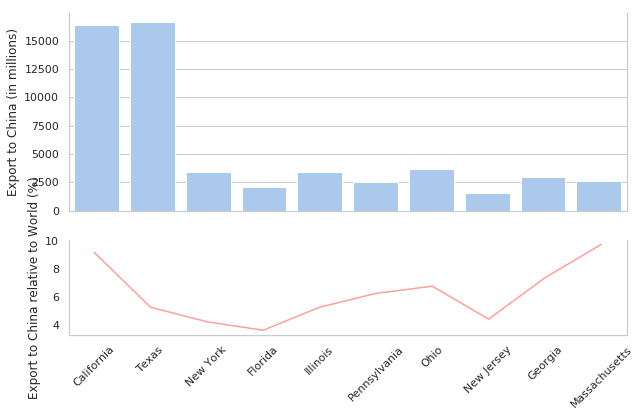

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


# Top 10 states with highest GPD 
# df_export_china = trade_china_2018.loc[trade_china_2018.State != 'UNITED STATES'].sort_values('export_normalized', ascending = False)
# df_export_china_top10 = df_export_china.iloc[:10, :]

df_export_china = trade_china_2018.loc[trade_china_2018.State != 'UNITED STATES'] # .sort_values('export_normalized', ascending = False)
df_export_china.set_index('State',inplace = True)
df_export_china_top10 = df_export_china.loc[top10]


export_percent = 100* trade_china_2018.set_index(['State', 'Year'])['export_normalized'] \
                  / trade_world_2018.set_index(['State', 'Year'])['export_normalized']
# export_percent = export_percent.reset_index().sort_values('export_normalized', ascending = False).iloc[:10, :] #.loc[df_export.State != 'UNITED STATES']
export_percent = export_percent.reset_index()
# export_percent_top10 = export_percent[export_percent.State.isin(state_top10)]


# merge
df_export = pd.merge(df_export_china_top10, export_percent, how = 'left', on = 'State')




# settings for seaborn plotting 
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Export shown as barplot

plt.gcf().set_size_inches(10, 8)
plt.subplot(2,1,1)
ax1 = sns.barplot('State', 'export_normalized_x',
                  data = df_export ,
#                   order = [3,5,7],
                  label="Export ", color="b"
                )
plt.gca().set_xticklabels('')
plt.ylabel('Export to China (in millions)')
plt.xlabel('')



# Percentage of export shown as lineplot
plt.subplot(4,1,3)
# plt.twinx()
plt.plot('State', 'export_normalized_y',
                   data = df_export, #  style_order = top10,
                  label="Export (%)", color="r", # ax = ax2
                  )
plt.ylabel('Export to China relative to World (%)')
plt.grid(b=None)
plt.xticks(rotation = 45)



# plt.subplot(2,1,2)
# ax1 = sns.barplot('State', 'import_normalized',
#                   data = df_export ,
#                   label="Export ", color="b"
#                 )
# plt.xticks(rotation = 45)
# plt.ylabel('Import to US (in millions)')
# plt.xlabel('States')



# turn off grid
# ax1.grid(False)
# ax2.grid(False)

# remove top axes spine
sns.despine(top=True, right = False)


# A bar chart to compare the export and percent of export of the democratic states and republican states based on the presidential election result of 2016;

**SUM of export to china, sum of export to world, then divide**

In [0]:
trade_china_2016 = trade_china.query('Year == 2016') 
trade_world_2016 = trade_world.query('Year == 2016') 
export_percent_2016 = (trade_china_2016.set_index(['State', 'Year'])['export_normalized'] \
                  / trade_world_2016.set_index(['State', 'Year'])['export_normalized']).reset_index() 

export_percent_2016.rename(columns = {'export_normalized': 'export_normalized_perc'}, inplace = True)


# base plot
base = alt.Chart(trade_china_2016).encode(
    alt.X('State:N', 
          sort = alt.EncodingSortField(field="export_normalized", order = 'descending')), 
).transform_filter(
  alt.datum.State != 'UNITED STATES'
).transform_lookup(
  lookup = 'State', from_ = alt.LookupData(election, 'State', ['Party'])
).transform_lookup(
  lookup = 'State', from_ = alt.LookupData(export_percent_2016, 'State', ['export_normalized_perc'])
).properties(
  width = 400
)


# Republic
republic_bar = base.mark_bar().encode(
    alt.Y('export_normalized:Q', 
        title = 'Export in millions'),
#   order=alt.Order('export_normalized', sort='ascending')
).transform_filter(
  alt.datum.Party == 'Republican'
)


republic_line = base.mark_line().encode(
    alt.Y('export_normalized_perc:Q', title = 'Export (%)')
).transform_filter(
  alt.datum.Party == 'Republican'
)


# Democratic
democratic_bar = base.mark_bar().encode(
  alt.Y('export_normalized:Q', title = 'Export in millions'),
).transform_filter(
  alt.datum.Party == 'Democratic'
)


democratic_line = base.mark_line().encode(
  alt.Y('export_normalized_perc:Q', title = 'Export (%)')
).transform_filter(
  alt.datum.Party == 'Democratic'
)



# Combine 
(republic_bar | democratic_bar) & (republic_line | democratic_line)

VConcatChart({
  data:                     State  Year  ...  export_normalized  import_normalized
  440         UNITED STATES  2016  ...      125876.818729      503899.435305
  441                 Texas  2016  ...       11727.980820       39913.775396
  442            California  2016  ...       15603.635579      156900.935194
  443            Washington  2016  ...       17564.225171       12578.716641
  444        South Carolina  2016  ...        7008.811416        6451.206076
  445                Oregon  2016  ...        6332.011178        2344.450192
  446                  Ohio  2016  ...        4087.900826       13305.279262
  447              Michigan  2016  ...        3561.009158       10761.014653
  448              New York  2016  ...        3020.689669       22556.417608
  449              Illinois  2016  ...        5550.271913       32908.672371
  450             Louisiana  2016  ...        8659.011806        1255.641088
  451               Alabama  2016  ...        3560.257090        2039.375447
  452               Georgia  2016  ...        2811.604313       20158.848910
  453         Massachusetts  2016  ...        2361.251248        4737.516675
  454          Pennsylvania  2016  ...        2420.449729       18370.224274
  455             Tennessee  2016  ...        2423.049498       25767.143210
  456        North Carolina  2016  ...        2384.732979       11062.356410
  457             Minnesota  2016  ...        1993.026439       11204.741450
  458              Kentucky  2016  ...        1917.782931        6417.916896
  459               Florida  2016  ...        1313.359388       12970.802578
  460               Indiana  2016  ...        1909.699001        8590.075691
  461             Wisconsin  2016  ...        1554.774860        6284.513054
  462            New Jersey  2016  ...        1543.330121       19254.961666
  463              Virginia  2016  ...        1771.129661        7701.951047
  464               Arizona  2016  ...        1318.550280        2783.970554
  465           Puerto Rico  2016  ...         738.439745         761.774045
  466            New Mexico  2016  ...         541.317024         788.026044
  467                Alaska  2016  ...        1290.091309         495.581683
  468           Connecticut  2016  ...         869.646833        2512.891005
  469                Nevada  2016  ...         638.498741        5338.475958
  470              Missouri  2016  ...         941.370812        4739.319602
  471           Unallocated  2016  ...         751.842869        3587.602488
  472                Kansas  2016  ...         811.647479        2575.630313
  473           Mississippi  2016  ...         615.460775        4636.230495
  474                  Iowa  2016  ...         544.145525        1522.913522
  475              Maryland  2016  ...         528.435141        3373.574731
  476              Colorado  2016  ...         642.170345        2461.914742
  477                  Utah  2016  ...         706.221098        2170.146593
  478         West Virginia  2016  ...         507.114908         192.750100
  479              Nebraska  2016  ...         512.422760         966.147185
  480                 Idaho  2016  ...         676.004018        1547.487661
  481              Delaware  2016  ...         371.292704         415.793696
  482         New Hampshire  2016  ...         328.487096         988.805401
  483              Arkansas  2016  ...         299.211802        3332.067500
  484                 Maine  2016  ...         225.002469         402.735782
  485              Oklahoma  2016  ...         237.140070        2192.115022
  486               Vermont  2016  ...         192.022220         270.410905
  487          Rhode Island  2016  ...         177.437247        1291.898989
  488               Montana  2016  ...         112.335912          94.335399
  489               Wyoming  2016  ...          34.302583         160.173537
  490          South Dakota  2016  ...          70.5

In [0]:
trade_china_2016 = trade_china.query('Year == 2016') 
trade_world_2016 = trade_world.query('Year == 2016') 
export_percent_2016 = (trade_china_2016.set_index(['State', 'Year'])['export_normalized'] \
                  / trade_world_2016.set_index(['State', 'Year'])['export_normalized']).reset_index() 

export_percent_2016.rename(columns = {'export_normalized': 'export_normalized_perc'}, inplace = True)
# trade_china_2016.dropna(subset = 'Party')


df_ = pd.merge(trade_china_2016, election, how = 'left', on = 'State')
df = pd.merge(df_, export_percent_2016, how = 'left', on = 'State')
df.dropna(subset=['Party'], inplace = True)


# base plot
base = alt.Chart(df).encode(
    alt.X( 'Party:N' )
).transform_filter(
  alt.datum.State != 'UNITED STATES'
).properties(
  width = 400
)


bar = base.mark_bar().encode(
    alt.Y('export_normalized:Q', aggregate='sum', 
        title = 'Export in millions'),  
    tooltip = ['State:N'], 
#     color = 'State:N'
)


# line = base.mark_line().encode(
#     alt.Y('export_normalized_perc:Q', title = 'Export (%)')
# ).transform_aggregate( 
#     percent='' 
# )


# # Republic
# republic_bar = base.mark_bar().encode(
#     alt.Y('export_normalized:Q', 
#         title = 'Export in millions'),
# #   order=alt.Order('export_normalized', sort='ascending')
# ).transform_filter(
#   alt.datum.Party == 'Republican'
# )


# republic_line = base.mark_line().encode(
#     alt.Y('export_normalized_perc:Q', title = 'Export (%)')
# ).transform_filter(
#   alt.datum.Party == 'Republican'
# )


# # Democratic
# democratic_bar = base.mark_bar().encode(
#   alt.Y('export_normalized:Q', title = 'Export in millions'),
# ).transform_filter(
#   alt.datum.Party == 'Democratic'
# )


# democratic_line = base.mark_line().encode(
#   alt.Y('export_normalized_perc:Q', title = 'Export (%)')
# ).transform_filter(
#   alt.datum.Party == 'Democratic'
# )



# # Combine 
# (republic_bar | democratic_bar) & (republic_line | democratic_line)

In [0]:
bar

Chart({
  data:                    State  Year_x  ...  Year_y  export_normalized_perc
  1                  Texas    2016  ...    2016                0.046541
  2             California    2016  ...    2016                0.087635
  3             Washington    2016  ...    2016                0.202664
  4         South Carolina    2016  ...    2016                0.205391
  5                 Oregon    2016  ...    2016                0.266966
  6                   Ohio    2016  ...    2016                0.076067
  7               Michigan    2016  ...    2016                0.059701
  8               New York    2016  ...    2016                0.036155
  9               Illinois    2016  ...    2016                0.085366
  10             Louisiana    2016  ...    2016                0.164444
  11               Alabama    2016  ...    2016                0.159642
  12               Georgia    2016  ...    2016                0.072348
  13         Massachusetts    2016  ...    2016                0.083706
  14          Pennsylvania    2016  ...    2016                0.060949
  15             Tennessee    2016  ...    2016                0.070621
  16        North Carolina    2016  ...    2016                0.072531
  17             Minnesota    2016  ...    2016                0.095282
  18              Kentucky    2016  ...    2016                0.060285
  19               Florida    2016  ...    2016                0.023170
  20               Indiana    2016  ...    2016                0.050589
  21             Wisconsin    2016  ...    2016                0.067855
  22            New Jersey    2016  ...    2016                0.045439
  23              Virginia    2016  ...    2016                0.099673
  24               Arizona    2016  ...    2016                0.055007
  26            New Mexico    2016  ...    2016                0.137408
  27                Alaska    2016  ...    2016                0.272214
  28           Connecticut    2016  ...    2016                0.055459
  29                Nevada    2016  ...    2016                0.060016
  30              Missouri    2016  ...    2016                0.062012
  32                Kansas    2016  ...    2016                0.073370
  33           Mississippi    2016  ...    2016                0.053780
  34                  Iowa    2016  ...    2016                0.041204
  35              Maryland    2016  ...    2016                0.050251
  36              Colorado    2016  ...    2016                0.077758
  37                  Utah    2016  ...    2016                0.053674
  38         West Virginia    2016  ...    2016                0.092262
  39              Nebraska    2016  ...    2016                0.073710
  40                 Idaho    2016  ...    2016                0.127236
  41              Delaware    2016  ...    2016                0.075445
  42         New Hampshire    2016  ...    2016                0.072768
  43              Arkansas    2016  ...    2016                0.048002
  44                 Maine    2016  ...    2016                0.072134
  45              Oklahoma    2016  ...    2016                0.043138
  46               Vermont    2016  ...    2016                0.058891
  47          Rhode Island    2016  ...    2016                0.071494
  48               Montana    2016  ...    2016                0.075818
  49               Wyoming    2016  ...    2016                0.028660
  50          South Dakota    2016  ...    2016                0.053167
  51                Hawaii    2016  ...    2016                0.104388
  52          North Dakota    2016  ...    2016                0.004166
  53  District of Columbia    2016  ...    2016                0.000734
  
  [51 rows x 9 columns],
  encoding: FacetedEncoding({
    tooltip: [Tooltip({
      field: 'State',
      type: 'nominal'
    })],
    x: X({
      field: 'Party',
      type: 'nominal'
    }),
    y: Y({
      aggregate: 'sum',
      fie

In [0]:
trade_world_2018.head()

,State,Year,export,export_normalized
1045,UNITED STATES,2018,1664055580908,1.664056e+06
1046,Texas,2018,315447759163,3.154478e+05
1047,California,2018,178404767473,1.784048e+05
1048,New York,2018,81487255805,8.148726e+04
1049,Washington,2018,77700205691,7.770021e+04


In [0]:
gdp_2018

,State,Q1,Q2,Q3,Q4,region,gdp
0,Connecticut,270268.0,269863.0,276934.0,279653.0,New England,274179.50
1,Maine,63173.0,64082.0,64798.0,65349.0,New England,64350.50
2,Massachusetts,558137.0,565224.0,570024.0,575635.0,New England,567255.00
3,New Hampshire,83566.0,84035.0,85201.0,86046.0,New England,84712.00
4,Rhode Island,60503.0,61432.0,60807.0,61341.0,New England,61020.75
5,Vermont,33193.0,33760.0,33794.0,34154.0,New England,33725.25
6,Delaware,73168.0,74104.0,76084.0,76537.0,Mideast,74973.25
7,District of Columbia,137894.0,138995.0,141729.0,142502.0,Mideast,140280.00
8,Maryland,406765.0,413154.0,413990.0,417776.0,Mideast,412921.25
9,New Jersey,613929.0,622802.0,627955.0,634721.0,Mideast,624851.75


# Time-Series Plots

## Data pre-processing

In [0]:
# only select state data

# export_china = export_china.iloc[1:, ] 
# import_china = import_china.iloc[1:, ]
# export_world = export_world.iloc[1:, ]

In [0]:
# melt the data into tidy data format for import and export

df_export_china = export_china.melt(id_vars=["State"], var_name="Year", value_name="Export")
df_import_china = import_china.melt(id_vars=["State"], var_name="Year", value_name="Import")
df_trade_china = pd.merge(df_export_china, df_import_china, how='inner', on=['Year', 'State'])
df_trade_china = df_trade_china[~df_trade_china.State.isin(['Virgin Islands', 'Puerto Rico', 'Unallocated'])]
df_trade_china['Surplus'] = df_trade_china.eval('Export - Import')

# conver the value to million dollars
df_trade_china['Export'] = np.round(df_trade_china['Export']/1e6)
df_trade_china['Import'] = np.round(df_trade_china['Import']/1e6)
df_trade_china['Surplus'] = np.round(df_trade_china['Surplus']/1e6)

df_trade_china.Year = df_trade_china.Year.astype('int') # convert Year to integer

df_trade_china.head()

,State,Year,Export,Import,Surplus
0,UNITED STATES,2008,69733.0,337773.0,-268040.0
1,Texas,2008,8422.0,31906.0,-23485.0
2,California,2008,10982.0,98676.0,-87695.0
3,Washington,2008,8310.0,11343.0,-3033.0
4,South Carolina,2008,790.0,3568.0,-2778.0


In [0]:
# melt the data into tidy data format for export and percent export 

df_export_world = export_world.melt(id_vars=["State"], var_name="Year", value_name="Export to World")
df_export = pd.merge(df_export_china, df_export_world, how='inner', on=['Year', 'State'])
df_export = df_export[~df_export.State.isin(['Virgin Islands', 'Puerto Rico', 'Unallocated'])]
df_export.rename(columns={'Export':'Export to China'}, inplace=True)
df_export['Percent of Export to China'] = df_export['Export to China']/df_export['Export to World']

# conver the value to million dollars
df_export['Export to China'] = np.round(df_export['Export to China']/1e6)
df_export['Export to World'] = np.round(df_export['Export to World']/1e6)

df_export['Percent of Export to China'] = df_export['Percent of Export to China']

df_export.head()

,State,Year,Export to China,Export to World,Percent of Export to China
0,UNITED STATES,1999,13118.0,692821.0,0.018934
1,Texas,1999,900.0,83177.0,0.010817
2,California,1999,2395.0,97920.0,0.024456
3,Washington,1999,2040.0,36731.0,0.055552
4,South Carolina,1999,139.0,7150.0,0.019444


In [0]:
# min percent of export to china in total export
df_export['Percent of Export to China'].min()

0.0007338530382185293

In [0]:
# max percent of export to china in total export
df_export['Percent of Export to China'].max()

0.3023246211198641

convert the data to dollar value in 2018

In [0]:
# convert df_trade_china
# we don't need to convert df_export b/c we are only interested in percent of export

df_trade_china = pd.merge(df_trade_china, ppi_year_2018, how='left', on='Year')
df_trade_china.Export = df_trade_china.eval('Export/PPIACO')
df_trade_china.Import = df_trade_china.eval('Import/PPIACO')
df_trade_china.Surplus = df_trade_china.eval('Surplus/PPIACO')

# keep one copy of unmelted df_trade_china
df_trade_china_copy = df_trade_china.copy()

df_trade_china

,State,Year,Export,Import,Surplus,PPIACO
0,UNITED STATES,2008,74278.472243,359790.377654,-285511.905411,0.938805
1,Texas,2008,8970.979210,33985.759044,-25015.845018,0.938805
2,California,2008,11697.850116,105108.091249,-93411.306316,0.938805
3,Washington,2008,8851.678608,12082.381522,-3230.702914,0.938805
4,South Carolina,2008,841.495319,3800.576326,-2959.081007,0.938805
5,Oregon,2008,2629.939168,2848.301877,-218.362709,0.938805
6,Ohio,2008,1937.569601,10272.633994,-8335.064393,0.938805
7,Michigan,2008,1371.956925,4247.953584,-2877.061843,0.938805
8,New York,2008,2998.492814,20685.872269,-17687.379456,0.938805
9,Illinois,2008,2676.807261,21252.550130,-18575.742868,0.938805


In [0]:
# melt the data into tidy data format for import and export

df_trade_china = df_trade_china.drop(columns=['PPIACO'])
df_trade_china = df_trade_china.melt(id_vars=["State", "Year"], var_name="Category", value_name="Trade, in Million Dollars")
df_trade_china['Trade, in Million Dollars'] = df_trade_china['Trade, in Million Dollars'].astype(int) # convert to integer
df_trade_china.head()

,State,Year,Category,"Trade, in Million Dollars"
0,UNITED STATES,2008,Export,74278
1,Texas,2008,Export,8970
2,California,2008,Export,11697
3,Washington,2008,Export,8851
4,South Carolina,2008,Export,841


## Create Plots

### Export,  Import and Surplus/Deficit

Interactive Plots

In [0]:
df_trade_china.State.unique()

array(['UNITED STATES', 'Texas', 'California', 'Washington',
       'South Carolina', 'Oregon', 'Ohio', 'Michigan', 'New York',
       'Illinois', 'Louisiana', 'Alabama', 'Georgia', 'Massachusetts',
       'Pennsylvania', 'Tennessee', 'North Carolina', 'Minnesota',
       'Kentucky', 'Florida', 'Indiana', 'Wisconsin', 'New Jersey',
       'Virginia', 'Arizona', 'New Mexico', 'Alaska', 'Connecticut',
       'Nevada', 'Missouri', 'Kansas', 'Mississippi', 'Iowa', 'Maryland',
       'Colorado', 'Utah', 'West Virginia', 'Nebraska', 'Idaho',
       'Delaware', 'New Hampshire', 'Arkansas', 'Maine', 'Oklahoma',
       'Vermont', 'Rhode Island', 'Montana', 'Wyoming', 'South Dakota',
       'Hawaii', 'North Dakota', 'District of Columbia'], dtype=object)

In [0]:
import altair as alt

states = list(df_trade_china.State.unique())
input_dropdown = alt.binding_select(options=states)
select_state = alt.selection_single(name='Select', fields=['State'],
                                   bind=input_dropdown)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year'], empty='none')

# The basic line
base = alt.Chart(df_trade_china).encode(
    alt.X('Year:O'),
    alt.Y('Trade, in Million Dollars:Q'),
    color='Category:N'
).transform_filter(select_state)

# add drop-down menu
lines = base.mark_line().add_selection(select_state
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df_trade_china).mark_point().encode(
    x='Year:O',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = base.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = base.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Trade, in Million Dollars:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df_trade_china).mark_rule(color='gray').encode(
    x='Year:O',
).transform_filter(
    nearest
)

#Put the five layers into a chart and bind the data
alt.layer(
    lines, selectors, points, rules, text
).properties(
    width=500, height=300
).configure_axisX(
    labelAngle=0
).configure_axis(
    titleFontSize=12.5,
    labelFontSize=12.5
).configure_legend(
    titleFontSize=12.5,
    labelFontSize=12.5
)

LayerChart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    }),
    legend: LegendConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    })
  }),
  data:                      State  Year Category  Trade, in Million Dollars
  0            UNITED STATES  2008   Export                      74278
  1                    Texas  2008   Export                       8970
  2               California  2008   Export                      11697
  3               Washington  2008   Export                       8851
  4           South Carolina  2008   Export                        841
  5                   Oregon  2008   Export                       2629
  6                     Ohio  2008   Export                       1937
  7                 Michigan  2008   Export                       1371
  8                 New York  2008   Export                       2998
  9                 Illinois  2008   Export                       2676
  10               Louisiana  2008   Export                       3706
  11                 Alabama  2008   Export                        870
  12                 Georgia  2008   Export                       2132
  13           Massachusetts  2008   Export                       1664
  14            Pennsylvania  2008   Export                       1736
  15               Tennessee  2008   Export                       1452
  16          North Carolina  2008   Export                       2069
  17               Minnesota  2008   Export                       1088
  18                Kentucky  2008   Export                        643
  19                 Florida  2008   Export                        928
  20                 Indiana  2008   Export                        990
  21               Wisconsin  2008   Export                       1311
  22              New Jersey  2008   Export                       1044
  23                Virginia  2008   Export                       1239
  24                 Arizona  2008   Export                       1336
  25              New Mexico  2008   Export                        692
  26                  Alaska  2008   Export                        780
  27             Connecticut  2008   Export                        720
  28                  Nevada  2008   Export                        396
  29                Missouri  2008   Export                       1005
  ...                    ...   ...      ...                        ...
  1686            New Jersey  2018  Surplus                     -17131
  1687              Virginia  2018  Surplus                      -6472
  1688               Arizona  2018  Surplus                      -2209
  1689            New Mexico  2018  Surplus                        435
  1690                Alaska  2018  Surplus                        708
  1691           Connecticut  2018  Surplus                      -1358
  1692                Nevada  2018  Surplus                      -3049
  1693              Missouri  2018  Surplus                      -4117
  1694                Kansas  2018  Surplus                      -2199
  1695           Mississippi  2018  Surplus                      -3520
  1696                  Iowa  2018  Surplus                      -1474
  1697              Maryland  2018  Surplus                      -3005
  1698              Colorado  2018  Surplus                      -1430
  1699                  Utah  2018  Surplus                      -2150
  1700         West Virginia  2018  Surplus                        249
  1701              Nebraska  2018  Surplus                       -529
  1702                 Idaho  2018  Surplus                      -2467
  1703              Delaware  2018  Surplus                        -71
  1704         New Hampshire  2018  Surplus                       -699
  1705              Arkansas  2018  Surplus                      -4853
  1706                 Maine  2018  Surpl


Summary of Export, Import and Surplus/Deficit:

* States that have increase in both import and export and relatively stable surplus/deficit:
  *  Texas, South Carolina, Michigan, Alabama, Indiana, Nevada, Colorado and Utah, Nebraska, Delaware, Maine, Montana, Wyoming, 
* States that having stable import and increasing export:
  * Kentucky, Ohio, 
* States that having stable export and increasing import:
  * Florida, Wisconsin, New Jersey, Virginia, Arizona, Missouri, Mississippi, Maryland, Idaho, New Hampshire, Arkansas, Oklahoma, South Dakota, North Dakota, California, Illinois, Georgia, , Pennsylvania, Tennessee, North Carolina, Minnesota, 
* States that have stable/constant import and export:
  * New York, Massachusetts, Rhode Island, Hawaii, Connecticut, 
* States that have unique trend:
  * Oregon and Alaska: overall increasing but up-and-down
  * Louisiana: import stable; export first increases and then decreases (sharply in 2018)
  * New Mexico: export first decreased then consistant for some time and then goes up
  * Kansas and Iow and Utah: import increasing, export first increasing then decreasing
  * West Virginia, Vermont: export first increases and then decreases, import relatively stable
  * DC: stable but sharp increase in import
  * Washington: import and export goes into opposite direction and changed direction in 2014


Static plots

In [0]:
import altair as alt

states = list(df_trade_china.State.unique())
input_dropdown = alt.binding_select(options=states)
select_state = alt.selection_single(name='Select', fields=['State'],
                                   bind=input_dropdown)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year'], empty='none')

# The basic line
base = alt.Chart(df_trade_china).encode(
    alt.X('Year:O'),
    alt.Y('Trade, in Million Dollars:Q'),
    color='Category:N'
).transform_filter(select_state)

# add drop-down menu
lines = base.mark_line().add_selection(select_state
).properties(
    width=500, height=300
).configure_axisX(
    labelAngle=0
).configure_axis(
    titleFontSize=12.5,
    labelFontSize=12.5
).configure_legend(
    titleFontSize=12.5,
    labelFontSize=12.5
)

lines

Chart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    }),
    legend: LegendConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    })
  }),
  data:                      State  Year Category  Trade, in Million Dollars
  0            UNITED STATES  2008   Export                      74278
  1                    Texas  2008   Export                       8970
  2               California  2008   Export                      11697
  3               Washington  2008   Export                       8851
  4           South Carolina  2008   Export                        841
  5                   Oregon  2008   Export                       2629
  6                     Ohio  2008   Export                       1937
  7                 Michigan  2008   Export                       1371
  8                 New York  2008   Export                       2998
  9                 Illinois  2008   Export                       2676
  10               Louisiana  2008   Export                       3706
  11                 Alabama  2008   Export                        870
  12                 Georgia  2008   Export                       2132
  13           Massachusetts  2008   Export                       1664
  14            Pennsylvania  2008   Export                       1736
  15               Tennessee  2008   Export                       1452
  16          North Carolina  2008   Export                       2069
  17               Minnesota  2008   Export                       1088
  18                Kentucky  2008   Export                        643
  19                 Florida  2008   Export                        928
  20                 Indiana  2008   Export                        990
  21               Wisconsin  2008   Export                       1311
  22              New Jersey  2008   Export                       1044
  23                Virginia  2008   Export                       1239
  24                 Arizona  2008   Export                       1336
  25              New Mexico  2008   Export                        692
  26                  Alaska  2008   Export                        780
  27             Connecticut  2008   Export                        720
  28                  Nevada  2008   Export                        396
  29                Missouri  2008   Export                       1005
  ...                    ...   ...      ...                        ...
  1686            New Jersey  2018  Surplus                     -17131
  1687              Virginia  2018  Surplus                      -6472
  1688               Arizona  2018  Surplus                      -2209
  1689            New Mexico  2018  Surplus                        435
  1690                Alaska  2018  Surplus                        708
  1691           Connecticut  2018  Surplus                      -1358
  1692                Nevada  2018  Surplus                      -3049
  1693              Missouri  2018  Surplus                      -4117
  1694                Kansas  2018  Surplus                      -2199
  1695           Mississippi  2018  Surplus                      -3520
  1696                  Iowa  2018  Surplus                      -1474
  1697              Maryland  2018  Surplus                      -3005
  1698              Colorado  2018  Surplus                      -1430
  1699                  Utah  2018  Surplus                      -2150
  1700         West Virginia  2018  Surplus                        249
  1701              Nebraska  2018  Surplus                       -529
  1702                 Idaho  2018  Surplus                      -2467
  1703              Delaware  2018  Surplus                        -71
  1704         New Hampshire  2018  Surplus                       -699
  1705              Arkansas  2018  Surplus                      -4853
  1706                 Maine  2018  Surplus   

In [0]:
import altair as alt

states = list(df_trade_china.State.unique())
input_dropdown = alt.binding_select(options=states)
select_state = alt.selection_single(name='Select', fields=['State'],
                                   bind=input_dropdown)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year'], empty='none')

# The basic line
base = alt.Chart(df_trade_china).encode(
    alt.X('Year:O'),
    alt.Y('Trade, in Million Dollars:Q'),
    color=alt.Color('Category', legend=None),
).transform_filter(select_state)

# add drop-down menu
lines = base.mark_line().add_selection(select_state
).properties(
    width=500, height=300
).configure_axisX(
    labelAngle=0
).configure_axis(
    titleFontSize=12.5,
    labelFontSize=12.5
)

lines

Chart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    })
  }),
  data:                      State  Year Category  Trade, in Million Dollars
  0            UNITED STATES  2008   Export                      74278
  1                    Texas  2008   Export                       8970
  2               California  2008   Export                      11697
  3               Washington  2008   Export                       8851
  4           South Carolina  2008   Export                        841
  5                   Oregon  2008   Export                       2629
  6                     Ohio  2008   Export                       1937
  7                 Michigan  2008   Export                       1371
  8                 New York  2008   Export                       2998
  9                 Illinois  2008   Export                       2676
  10               Louisiana  2008   Export                       3706
  11                 Alabama  2008   Export                        870
  12                 Georgia  2008   Export                       2132
  13           Massachusetts  2008   Export                       1664
  14            Pennsylvania  2008   Export                       1736
  15               Tennessee  2008   Export                       1452
  16          North Carolina  2008   Export                       2069
  17               Minnesota  2008   Export                       1088
  18                Kentucky  2008   Export                        643
  19                 Florida  2008   Export                        928
  20                 Indiana  2008   Export                        990
  21               Wisconsin  2008   Export                       1311
  22              New Jersey  2008   Export                       1044
  23                Virginia  2008   Export                       1239
  24                 Arizona  2008   Export                       1336
  25              New Mexico  2008   Export                        692
  26                  Alaska  2008   Export                        780
  27             Connecticut  2008   Export                        720
  28                  Nevada  2008   Export                        396
  29                Missouri  2008   Export                       1005
  ...                    ...   ...      ...                        ...
  1686            New Jersey  2018  Surplus                     -17131
  1687              Virginia  2018  Surplus                      -6472
  1688               Arizona  2018  Surplus                      -2209
  1689            New Mexico  2018  Surplus                        435
  1690                Alaska  2018  Surplus                        708
  1691           Connecticut  2018  Surplus                      -1358
  1692                Nevada  2018  Surplus                      -3049
  1693              Missouri  2018  Surplus                      -4117
  1694                Kansas  2018  Surplus                      -2199
  1695           Mississippi  2018  Surplus                      -3520
  1696                  Iowa  2018  Surplus                      -1474
  1697              Maryland  2018  Surplus                      -3005
  1698              Colorado  2018  Surplus                      -1430
  1699                  Utah  2018  Surplus                      -2150
  1700         West Virginia  2018  Surplus                        249
  1701              Nebraska  2018  Surplus                       -529
  1702                 Idaho  2018  Surplus                      -2467
  1703              Delaware  2018  Surplus                        -71
  1704         New Hampshire  2018  Surplus                       -699
  1705              Arkansas  2018  Surplus                      -4853
  1706                 Maine  2018  Surplus                       -146
  1707              Oklahoma  2018  Surplus                    

In [0]:
import altair as alt

states = list(df_trade_china.State.unique())
input_dropdown = alt.binding_select(options=states)
select_state = alt.selection_single(name='Select', fields=['State'],
                                   bind=input_dropdown)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year'], empty='none')

# The basic line
base = alt.Chart(df_trade_china).encode(
    alt.X('Year:O'),
    alt.Y('Trade, in Million Dollars:Q'),
    color=alt.Color('Category', legend=alt.Legend(orient="top")),
).transform_filter(select_state)

# add drop-down menu
lines = base.mark_line().add_selection(select_state
).properties(
    width=500, height=300
).configure_axisX(
    labelAngle=0
).configure_axis(
    titleFontSize=12.5,
    labelFontSize=12.5
).configure_legend(
    titleFontSize=15,
    labelFontSize=15
)

lines

Chart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    }),
    legend: LegendConfig({
      labelFontSize: 15,
      titleFontSize: 15
    })
  }),
  data:                      State  Year Category  Trade, in Million Dollars
  0            UNITED STATES  2008   Export                      74278
  1                    Texas  2008   Export                       8970
  2               California  2008   Export                      11697
  3               Washington  2008   Export                       8851
  4           South Carolina  2008   Export                        841
  5                   Oregon  2008   Export                       2629
  6                     Ohio  2008   Export                       1937
  7                 Michigan  2008   Export                       1371
  8                 New York  2008   Export                       2998
  9                 Illinois  2008   Export                       2676
  10               Louisiana  2008   Export                       3706
  11                 Alabama  2008   Export                        870
  12                 Georgia  2008   Export                       2132
  13           Massachusetts  2008   Export                       1664
  14            Pennsylvania  2008   Export                       1736
  15               Tennessee  2008   Export                       1452
  16          North Carolina  2008   Export                       2069
  17               Minnesota  2008   Export                       1088
  18                Kentucky  2008   Export                        643
  19                 Florida  2008   Export                        928
  20                 Indiana  2008   Export                        990
  21               Wisconsin  2008   Export                       1311
  22              New Jersey  2008   Export                       1044
  23                Virginia  2008   Export                       1239
  24                 Arizona  2008   Export                       1336
  25              New Mexico  2008   Export                        692
  26                  Alaska  2008   Export                        780
  27             Connecticut  2008   Export                        720
  28                  Nevada  2008   Export                        396
  29                Missouri  2008   Export                       1005
  ...                    ...   ...      ...                        ...
  1686            New Jersey  2018  Surplus                     -17131
  1687              Virginia  2018  Surplus                      -6472
  1688               Arizona  2018  Surplus                      -2209
  1689            New Mexico  2018  Surplus                        435
  1690                Alaska  2018  Surplus                        708
  1691           Connecticut  2018  Surplus                      -1358
  1692                Nevada  2018  Surplus                      -3049
  1693              Missouri  2018  Surplus                      -4117
  1694                Kansas  2018  Surplus                      -2199
  1695           Mississippi  2018  Surplus                      -3520
  1696                  Iowa  2018  Surplus                      -1474
  1697              Maryland  2018  Surplus                      -3005
  1698              Colorado  2018  Surplus                      -1430
  1699                  Utah  2018  Surplus                      -2150
  1700         West Virginia  2018  Surplus                        249
  1701              Nebraska  2018  Surplus                       -529
  1702                 Idaho  2018  Surplus                      -2467
  1703              Delaware  2018  Surplus                        -71
  1704         New Hampshire  2018  Surplus                       -699
  1705              Arkansas  2018  Surplus                      -4853
  1706                 Maine  2018  Surplus       

### Export and Percent Export

Percent of Export in Total Export. Can show the numbers.

In [0]:
def singleY_chart(y):
    """
    A quick function to plot an interactive plot for a single Y
    
    Args:
        y(string):   the column name of y
    Return:
        chart:       an interative times-series plot
    """
    
    states = list(df_export.State.unique())
    input_dropdown = alt.binding_select(options=states)
    select_state = alt.selection_single(name='Select', fields=['State'],
                                   bind=input_dropdown)
  
    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['Year'], empty='none')

    # The basic line
    base = alt.Chart(df_export).encode(
        alt.X('Year:O'),
        alt.Y(y, type='quantitative')
    ).transform_filter(select_state)

    # add drop-down menu
    line = base.mark_line().add_selection(select_state)

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(df_export).mark_point().encode(
        x='Year:O',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = base.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = base.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, alt.Y(y, type='quantitative'), alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(df_export).mark_rule(color='gray').encode(
        x='Year:O',
    ).transform_filter(
        nearest
    )

    # Put the five layers into a chart and bind the data
    chart = alt.layer(
        line, selectors, points, rules, text
    ).properties(
        width=500, height=300
    ).configure_axisX(
        labelAngle=0
    ).configure_axis(
        titleFontSize=12.5,
        labelFontSize=12.5
    ).configure_legend(
        titleFontSize=12.5,
        labelFontSize=12.5
    )

    return chart
  
  

In [0]:
singleY_chart('Percent of Export to China')

LayerChart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    }),
    legend: LegendConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    })
  }),
  data:                      State  Year  ...  Export to World  Percent of Export to China
  0            UNITED STATES  1999  ...         692821.0                    0.018934
  1                    Texas  1999  ...          83177.0                    0.010817
  2               California  1999  ...          97920.0                    0.024456
  3               Washington  1999  ...          36731.0                    0.055552
  4           South Carolina  1999  ...           7150.0                    0.019444
  5                   Oregon  1999  ...          10471.0                    0.014379
  6                     Ohio  1999  ...          24883.0                    0.009836
  7                 Michigan  1999  ...          31086.0                    0.006377
  8                 New York  1999  ...          37067.0                    0.015777
  9                 Illinois  1999  ...          29432.0                    0.014880
  10               Louisiana  1999  ...          15842.0                    0.041899
  11                 Alabama  1999  ...           6192.0                    0.016488
  12                 Georgia  1999  ...          13749.0                    0.014576
  13           Massachusetts  1999  ...          16805.0                    0.019740
  14            Pennsylvania  1999  ...          16170.0                    0.016286
  15               Tennessee  1999  ...           9868.0                    0.011290
  16          North Carolina  1999  ...          15007.0                    0.014823
  17               Minnesota  1999  ...           9373.0                    0.017984
  18                Kentucky  1999  ...           8877.0                    0.007158
  19                 Florida  1999  ...          24155.0                    0.030622
  20                 Indiana  1999  ...          12910.0                    0.010460
  21               Wisconsin  1999  ...           9673.0                    0.013809
  22              New Jersey  1999  ...          15354.0                    0.012380
  23                Virginia  1999  ...          11483.0                    0.015122
  24                 Arizona  1999  ...          11824.0                    0.016339
  26              New Mexico  1999  ...           3133.0                    0.070340
  27                  Alaska  1999  ...           2564.0                    0.043241
  28             Connecticut  1999  ...           7231.0                    0.009040
  29                  Nevada  1999  ...           1067.0                    0.010189
  30                Missouri  1999  ...           6059.0                    0.008606
  ...                    ...   ...  ...              ...                         ...
  1067            New Jersey  2018  ...          35663.0                    0.044103
  1068              Virginia  2018  ...          18358.0                    0.066317
  1069               Arizona  2018  ...          22388.0                    0.053313
  1071            New Mexico  2018  ...           3655.0                    0.302325
  1072                Alaska  2018  ...           4773.0                    0.213526
  1073           Connecticut  2018  ...          17400.0                    0.054234
  1074                Nevada  2018  ...          11085.0                    0.082707
  1075              Missouri  2018  ...          14500.0                    0.053989
  1077                Kansas  2018  ...          11604.0                    0.056632
  1078           Mississippi  2018  ...          11808.0                    0.053992
  1079                  Iowa  2018  ...          14324.0                    0.043676
  1080              Maryland  2018  ...          12076.0                    0.

* Louisinana: Big drop from 16.4% in 2016 to  4.3% in 2018
* New Mexico: increased from 2.5% before 2007 to 26.5% in 2007, dropped to 2.5% from 2011 to 2015 and then increased again to 30% in 2018
* Kansas, Arkansas and Utah: peak around 2013 and dropped to half (14% to 6%, 9.5% to 5% and 9% to 4%)
* Iowa: peak at 9% around 2015 and dropped to 4.5% after 2016
* Vermont: peak at 18% around 2011 then dropped to 7% after 2015
* Hawaii: bouncing up and down around 9%

Static Plot showing both export to China and percent of export to China in total export

In [0]:
# 'line' and ' ' are created to force a layer grouped by label
# see https://github.com/altair-viz/altair/issues/984 for example
df_export['Line'] = 'Export to China'
df_export[' '] = 'Percent of Export to China'

states = list(df_export.State.unique())
input_dropdown = alt.binding_select(options=states)
select_state = alt.selection_single(name='Select', fields=['State'],
                                   bind=input_dropdown)

base = alt.Chart().encode(
    alt.X('Year:O', axis=alt.Axis(orient="bottom"))
).transform_filter(select_state)

line1 = base.mark_line().encode(
    alt.Y('Export to China', type='quantitative'),
    color=alt.Color('Line', legend=alt.Legend(orient="top"))).add_selection(select_state)

line2 = base.mark_line().encode(
    alt.Y('Percent of Export to China', type='quantitative'),
    color=' ')

vline = alt.Chart().mark_rule(color='red'
            ).encode(alt.X('Year:O')
            ).transform_filter(alt.datum.Year == '2001')

alt.layer(
    line1,
    line2,
#     vline,
    data=df_export
).resolve_scale(
    y='independent'
).configure_legend(
    titleFontSize=12.5,
    labelFontSize=12.5
)

LayerChart({
  config: Config({
    legend: LegendConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    })
  }),
  data:                      State  Year  ...             Line                            
  0            UNITED STATES  1999  ...  Export to China  Percent of Export to China
  1                    Texas  1999  ...  Export to China  Percent of Export to China
  2               California  1999  ...  Export to China  Percent of Export to China
  3               Washington  1999  ...  Export to China  Percent of Export to China
  4           South Carolina  1999  ...  Export to China  Percent of Export to China
  5                   Oregon  1999  ...  Export to China  Percent of Export to China
  6                     Ohio  1999  ...  Export to China  Percent of Export to China
  7                 Michigan  1999  ...  Export to China  Percent of Export to China
  8                 New York  1999  ...  Export to China  Percent of Export to China
  9                 Illinois  1999  ...  Export to China  Percent of Export to China
  10               Louisiana  1999  ...  Export to China  Percent of Export to China
  11                 Alabama  1999  ...  Export to China  Percent of Export to China
  12                 Georgia  1999  ...  Export to China  Percent of Export to China
  13           Massachusetts  1999  ...  Export to China  Percent of Export to China
  14            Pennsylvania  1999  ...  Export to China  Percent of Export to China
  15               Tennessee  1999  ...  Export to China  Percent of Export to China
  16          North Carolina  1999  ...  Export to China  Percent of Export to China
  17               Minnesota  1999  ...  Export to China  Percent of Export to China
  18                Kentucky  1999  ...  Export to China  Percent of Export to China
  19                 Florida  1999  ...  Export to China  Percent of Export to China
  20                 Indiana  1999  ...  Export to China  Percent of Export to China
  21               Wisconsin  1999  ...  Export to China  Percent of Export to China
  22              New Jersey  1999  ...  Export to China  Percent of Export to China
  23                Virginia  1999  ...  Export to China  Percent of Export to China
  24                 Arizona  1999  ...  Export to China  Percent of Export to China
  26              New Mexico  1999  ...  Export to China  Percent of Export to China
  27                  Alaska  1999  ...  Export to China  Percent of Export to China
  28             Connecticut  1999  ...  Export to China  Percent of Export to China
  29                  Nevada  1999  ...  Export to China  Percent of Export to China
  30                Missouri  1999  ...  Export to China  Percent of Export to China
  ...                    ...   ...  ...              ...                         ...
  1067            New Jersey  2018  ...  Export to China  Percent of Export to China
  1068              Virginia  2018  ...  Export to China  Percent of Export to China
  1069               Arizona  2018  ...  Export to China  Percent of Export to China
  1071            New Mexico  2018  ...  Export to China  Percent of Export to China
  1072                Alaska  2018  ...  Export to China  Percent of Export to China
  1073           Connecticut  2018  ...  Export to China  Percent of Export to China
  1074                Nevada  2018  ...  Export to China  Percent of Export to China
  1075              Missouri  2018  ...  Export to China  Percent of Export to China
  1077                Kansas  2018  ...  Export to China  Percent of Export to China
  1078           Mississippi  2018  ...  Export to China  Percent of Export to China
  1079                  Iowa  2018  ...  Export to China  Percent of Export to China
  1080              Maryland  2018  ...  Export to China  Percent of Export to China
  1081              Colorado  2018  ...  Export to China  Percent of Export to China
  1082                  Utah  2018  ...  Exp

### Test Case with Aritificial Data

In [0]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
source = pd.DataFrame(np.cumsum(np.random.randn(100, 1), 0).round(2),
                    columns=['A'], index=pd.RangeIndex(100, name='x'))
source = source.reset_index().melt('x', var_name='category', value_name='y1')
source['Type'] = 'First'

source_1 = source.copy()
source_1['y1'] = source_1['y1'] + 5
source_1['Type'] = 'Second'

source_2 = source.copy()
source_2['y1'] = source_2['y1'] - 5
source_2['Type'] = 'Third'

source = pd.concat([source, source_1, source_2])

source['y2'] = source['y1']/10

def singleY_chart(y):
  
    input_dropdown = alt.binding_select(options=['First', 'Second', 'Third'])
    selection = alt.selection_single(name='Select', fields=['Type'],
                                       bind=input_dropdown)

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['x'], empty='none')

    # The basic line
    base = alt.Chart(source).encode(
        alt.X('x:Q'),
        alt.Y(y, type='quantitative')
    ).transform_filter(selection)

    # add drop-down menu
    line = base.mark_line().add_selection(selection)

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
        x='x:Q',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = base.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = base.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, alt.Y(y, type='quantitative'), alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
        x='x:Q',
    ).transform_filter(
        nearest
    )

    # Put the five layers into a chart and bind the data
    chart = alt.layer(
        line, selectors, points, rules, text
    ).properties(
        width=500, height=300
    ).configure_axisX(
        labelAngle=0
    ).configure_axis(
        titleFontSize=12.5,
        labelFontSize=12.5
    ).configure_legend(
        titleFontSize=12.5,
        labelFontSize=12.5
    )

    return chart
  

singleY_chart('y1')

LayerChart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    }),
    legend: LegendConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    })
  }),
  data:      x category     y1   Type     y2
  0    0        A   0.50  First  0.050
  1    1        A   0.36  First  0.036
  2    2        A   1.01  First  0.101
  3    3        A   2.53  First  0.253
  4    4        A   2.30  First  0.230
  5    5        A   2.06  First  0.206
  6    6        A   3.64  First  0.364
  7    7        A   4.41  First  0.441
  8    8        A   3.94  First  0.394
  9    9        A   4.48  First  0.448
  10  10        A   4.02  First  0.402
  11  11        A   3.55  First  0.355
  12  12        A   3.79  First  0.379
  13  13        A   1.88  First  0.188
  14  14        A   0.16  First  0.016
  15  15        A  -0.41  First -0.041
  16  16        A  -1.42  First -0.142
  17  17        A  -1.11  First -0.111
  18  18        A  -2.01  First -0.201
  19  19        A  -3.43  First -0.343
  20  20        A  -1.96  First -0.196
  21  21        A  -2.19  First -0.219
  22  22        A  -2.12  First -0.212
  23  23        A  -3.54  First -0.354
  24  24        A  -4.09  First -0.409
  25  25        A  -3.98  First -0.398
  26  26        A  -5.13  First -0.513
  27  27        A  -4.75  First -0.475
  28  28        A  -5.35  First -0.535
  29  29        A  -5.64  First -0.564
  ..  ..      ...    ...    ...    ...
  70  70        A -14.07  Third -1.407
  71  71        A -12.53  Third -1.253
  72  72        A -12.57  Third -1.257
  73  73        A -11.00  Third -1.100
  74  74        A -13.62  Third -1.362
  75  75        A -12.80  Third -1.280
  76  76        A -12.71  Third -1.271
  77  77        A -13.01  Third -1.301
  78  78        A -12.92  Third -1.292
  79  79        A -14.91  Third -1.491
  80  80        A -15.13  Third -1.513
  81  81        A -14.77  Third -1.477
  82  82        A -13.29  Third -1.329
  83  83        A -13.81  Third -1.381
  84  84        A -14.62  Third -1.462
  85  85        A -15.12  Third -1.512
  86  86        A -14.20  Third -1.420
  87  87        A -13.88  Third -1.388
  88  88        A -14.41  Third -1.441
  89  89        A -13.89  Third -1.389
  90  90        A -13.80  Third -1.380
  91  91        A -12.83  Third -1.283
  92  92        A -13.53  Third -1.353
  93  93        A -13.86  Third -1.386
  94  94        A -14.25  Third -1.425
  95  95        A -15.71  Third -1.571
  96  96        A -15.42  Third -1.542
  97  97        A -15.16  Third -1.516
  98  98        A -15.15  Third -1.515
  99  99        A -15.38  Third -1.538
  
  [300 rows x 5 columns],
  height: 300,
  layer: [Chart({
    encoding: FacetedEncoding({
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'y1',
        type: 'quantitative'
      })
    }),
    mark: 'line',
    selection: {'Select': SelectionDef({
      bind: BindRadioSelect({
        input: 'select',
        options: ['First', 'Second', 'Third']
      }),
      fields: ['Type'],
      type: 'single'
    })},
    transform: [FilterTransform({
      filter: {'selection': 'Select'}
    })]
  }), Chart({
    encoding: FacetedEncoding({
      opacity: ValueDefWithOptionalConditionMarkPropFieldDefnumber({
        value: 0
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      })
    }),
    mark: 'point',
    selection: {'selector006': SelectionDef({
      empty: 'none',
      fields: ['x'],
      nearest: True,
      on: 'mouseover',
      type: 'single'
    })}
  }), Chart({
    encoding: FacetedEncoding({
      opacity: OpacityValue({
        condition: OpacityValue({
          selection: 'selector006',
          value: 1
        }),
        value: 0
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'y1',
        type: 'quantitative'
      })
    }),
    mark

In [0]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
source = pd.DataFrame(np.cumsum(np.random.randn(100, 1), 0).round(2),
                    columns=['A'], index=pd.RangeIndex(100, name='x'))
source = source.reset_index().melt('x', var_name='category', value_name='y1')
source['Type'] = 'First'

source_1 = source.copy()
source_1['y1'] = source_1['y1'] + 5
source_1['Type'] = 'Second'

source_2 = source.copy()
source_2['y1'] = source_2['y1'] - 5
source_2['Type'] = 'Third'

source = pd.concat([source, source_1, source_2])

source['y2'] = source['y1']/10 + np.random.randn(300, )/10

def singleY_chart():

    input_dropdown = alt.binding_select(options=['First', 'Second', 'Third'])
    selection = alt.selection_single(name='Select', fields=['Type'],
                                       bind=input_dropdown)

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['x'], empty='none')

    # The basic line
    base = alt.Chart(source).encode(
        alt.X('x:Q')
    ).transform_filter(selection)

    # add drop-down menu
    line_1 = base.mark_line().encode(alt.Y('y1'),
                              color=alt.value('red')).add_selection(selection)

    line_2 = base.mark_line().encode(alt.Y('y2'),
                              color=alt.value('blue'))

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
        x='x:Q',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = base.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = base.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, alt.Y('y2:Q'), alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
        x='x:Q',
    ).transform_filter(
        nearest
    )

    # Put the five layers into a chart and bind the data
    chart = alt.layer(
        line_1, line_2, selectors, points, rules, text 
    ).resolve_scale(
    y='independent'
    ).properties(
        width=500, height=300
    ).configure_axisX(
        labelAngle=0
    ).configure_axis(
        titleFontSize=12.5,
        labelFontSize=12.5
    ).configure_legend(
        titleFontSize=12.5,
        labelFontSize=12.5
    )

    return chart


singleY_chart()

LayerChart({
  config: Config({
    axis: AxisConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    }),
    axisX: AxisConfig({
      labelAngle: 0
    }),
    legend: LegendConfig({
      labelFontSize: 12.5,
      titleFontSize: 12.5
    })
  }),
  data:      x category     y1   Type        y2
  0    0        A   0.50  First -0.091537
  1    1        A   0.36  First -0.006065
  2    2        A   1.01  First  0.066729
  3    3        A   2.53  First  0.172772
  4    4        A   2.30  First  0.213871
  5    5        A   2.06  First  0.246405
  6    6        A   3.64  First  0.552619
  7    7        A   4.41  First  0.458458
  8    8        A   3.94  First  0.419755
  9    9        A   4.48  First  0.440555
  10  10        A   4.02  First  0.210123
  11  11        A   3.55  First  0.352349
  12  12        A   3.79  First  0.385023
  13  13        A   1.88  First  0.434324
  14  14        A   0.16  First -0.003236
  15  15        A  -0.41  First -0.010845
  16  16        A  -1.42  First -0.145471
  17  17        A  -1.11  First -0.227868
  18  18        A  -2.01  First -0.086718
  19  19        A  -3.43  First -0.267807
  20  20        A  -1.96  First -0.116897
  21  21        A  -2.19  First -0.309939
  22  22        A  -2.12  First -0.071721
  23  23        A  -3.54  First -0.494185
  24  24        A  -4.09  First -0.350314
  25  25        A  -3.98  First -0.178954
  26  26        A  -5.13  First -0.612054
  27  27        A  -4.75  First -0.531630
  28  28        A  -5.35  First -0.525035
  29  29        A  -5.64  First -0.614348
  ..  ..      ...    ...    ...       ...
  70  70        A -14.07  Third -1.404549
  71  71        A -12.53  Third -1.203200
  72  72        A -12.57  Third -1.111886
  73  73        A -11.00  Third -1.004073
  74  74        A -13.62  Third -1.146682
  75  75        A -12.80  Third -1.356735
  76  76        A -12.71  Third -1.183768
  77  77        A -13.01  Third -1.282666
  78  78        A -12.92  Third -1.073020
  79  79        A -14.91  Third -1.571830
  80  80        A -15.13  Third -1.596972
  81  81        A -14.77  Third -1.536939
  82  82        A -13.29  Third -1.541390
  83  83        A -13.81  Third -1.433576
  84  84        A -14.62  Third -1.537913
  85  85        A -15.12  Third -1.496961
  86  86        A -14.20  Third -1.385824
  87  87        A -13.88  Third -1.200383
  88  88        A -14.41  Third -1.345958
  89  89        A -13.89  Third -1.446690
  90  90        A -13.80  Third -1.469841
  91  91        A -12.83  Third -1.233808
  92  92        A -13.53  Third -1.485023
  93  93        A -13.86  Third -1.202854
  94  94        A -14.25  Third -1.307056
  95  95        A -15.71  Third -1.617918
  96  96        A -15.42  Third -1.713313
  97  97        A -15.16  Third -1.380613
  98  98        A -15.15  Third -1.526454
  99  99        A -15.38  Third -1.414218
  
  [300 rows x 5 columns],
  height: 300,
  layer: [Chart({
    encoding: FacetedEncoding({
      color: ValueDefWithOptionalConditionMarkPropFieldDefstringnull({
        value: 'red'
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'y1',
        type: 'quantitative'
      })
    }),
    mark: 'line',
    selection: {'Select': SelectionDef({
      bind: BindRadioSelect({
        input: 'select',
        options: ['First', 'Second', 'Third']
      }),
      fields: ['Type'],
      type: 'single'
    })},
    transform: [FilterTransform({
      filter: {'selection': 'Select'}
    })]
  }), Chart({
    encoding: FacetedEncoding({
      color: ValueDefWithOptionalConditionMarkPropFieldDefstringnull({
        value: 'blue'
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'y2',
        type: 'quantitative'
      })
    }),
    mark: 'line',
    transform: [FilterTransform({
      filter: {'selection': 'Select'}
    })]
  }), Chart({
    encoding: FacetedEncoding({
      opacity: ValueDefWithOptio

In [0]:
source['Line'] = 'y1'
source[' '] = 'y2'

input_dropdown = alt.binding_select(options=['First', 'Second', 'Third'])
selection = alt.selection_single(name='Type', fields=['Type'],
                                   bind=input_dropdown)

base = alt.Chart(source).encode(
    alt.X('x:Q')
).transform_filter(selection)

line1 = base.mark_line(point=True).encode(
    alt.Y('y1:Q'),
    color='Line').add_selection(selection)

line2 = base.mark_line(point=True).encode(
    alt.Y('y2:Q'),
    color=' ')

alt.layer(
    line1,
    line2
).resolve_scale(
    y='independent'
)

LayerChart({
  data:      x category     y1   Type        y2 Line    
  0    0        A   0.50  First -0.091537   y1  y2
  1    1        A   0.36  First -0.006065   y1  y2
  2    2        A   1.01  First  0.066729   y1  y2
  3    3        A   2.53  First  0.172772   y1  y2
  4    4        A   2.30  First  0.213871   y1  y2
  5    5        A   2.06  First  0.246405   y1  y2
  6    6        A   3.64  First  0.552619   y1  y2
  7    7        A   4.41  First  0.458458   y1  y2
  8    8        A   3.94  First  0.419755   y1  y2
  9    9        A   4.48  First  0.440555   y1  y2
  10  10        A   4.02  First  0.210123   y1  y2
  11  11        A   3.55  First  0.352349   y1  y2
  12  12        A   3.79  First  0.385023   y1  y2
  13  13        A   1.88  First  0.434324   y1  y2
  14  14        A   0.16  First -0.003236   y1  y2
  15  15        A  -0.41  First -0.010845   y1  y2
  16  16        A  -1.42  First -0.145471   y1  y2
  17  17        A  -1.11  First -0.227868   y1  y2
  18  18        A  -2.01  First -0.086718   y1  y2
  19  19        A  -3.43  First -0.267807   y1  y2
  20  20        A  -1.96  First -0.116897   y1  y2
  21  21        A  -2.19  First -0.309939   y1  y2
  22  22        A  -2.12  First -0.071721   y1  y2
  23  23        A  -3.54  First -0.494185   y1  y2
  24  24        A  -4.09  First -0.350314   y1  y2
  25  25        A  -3.98  First -0.178954   y1  y2
  26  26        A  -5.13  First -0.612054   y1  y2
  27  27        A  -4.75  First -0.531630   y1  y2
  28  28        A  -5.35  First -0.525035   y1  y2
  29  29        A  -5.64  First -0.614348   y1  y2
  ..  ..      ...    ...    ...       ...  ...  ..
  70  70        A -14.07  Third -1.404549   y1  y2
  71  71        A -12.53  Third -1.203200   y1  y2
  72  72        A -12.57  Third -1.111886   y1  y2
  73  73        A -11.00  Third -1.004073   y1  y2
  74  74        A -13.62  Third -1.146682   y1  y2
  75  75        A -12.80  Third -1.356735   y1  y2
  76  76        A -12.71  Third -1.183768   y1  y2
  77  77        A -13.01  Third -1.282666   y1  y2
  78  78        A -12.92  Third -1.073020   y1  y2
  79  79        A -14.91  Third -1.571830   y1  y2
  80  80        A -15.13  Third -1.596972   y1  y2
  81  81        A -14.77  Third -1.536939   y1  y2
  82  82        A -13.29  Third -1.541390   y1  y2
  83  83        A -13.81  Third -1.433576   y1  y2
  84  84        A -14.62  Third -1.537913   y1  y2
  85  85        A -15.12  Third -1.496961   y1  y2
  86  86        A -14.20  Third -1.385824   y1  y2
  87  87        A -13.88  Third -1.200383   y1  y2
  88  88        A -14.41  Third -1.345958   y1  y2
  89  89        A -13.89  Third -1.446690   y1  y2
  90  90        A -13.80  Third -1.469841   y1  y2
  91  91        A -12.83  Third -1.233808   y1  y2
  92  92        A -13.53  Third -1.485023   y1  y2
  93  93        A -13.86  Third -1.202854   y1  y2
  94  94        A -14.25  Third -1.307056   y1  y2
  95  95        A -15.71  Third -1.617918   y1  y2
  96  96        A -15.42  Third -1.713313   y1  y2
  97  97        A -15.16  Third -1.380613   y1  y2
  98  98        A -15.15  Third -1.526454   y1  y2
  99  99        A -15.38  Third -1.414218   y1  y2
  
  [300 rows x 7 columns],
  layer: [Chart({
    encoding: FacetedEncoding({
      color: Color({
        field: 'Line',
        type: 'nominal'
      }),
      x: X({
        field: 'x',
        type: 'quantitative'
      }),
      y: Y({
        field: 'y1',
        type: 'quantitative'
      })
    }),
    mark: MarkDef({
      point: True,
      type: 'line'
    }),
    selection: {'Type': SelectionDef({
      bind: BindRadioSelect({
        input: 'select',
        options: ['First', 'Second', 'Third']
      }),
      fields: ['Type'],
      type: 'single'
    })},
    transform: [FilterTransform({
      filter: {'selection': 'Type'}
    })]
  }), Chart({
    encoding: FacetedEncoding({
      color: Color({
        field: ' ',
        type: 'nominal'
      }),
      x: X({
        field: 'x',
        

### Export and Perent of Export in Different Regions

In [0]:
export_region = pd.merge(df_export.loc[df_export.Year == '2017', ['State', 'Export to China', 'Export to World']], gdp_2018[['State', 'region']], on='State', how ='left')
export_region.head()

,State,Export to China,Export to World,region
0,UNITED STATES,129894.0,1546273.0,NaN
1,Texas,16419.0,264541.0,Southwest
2,California,16433.0,172012.0,Far West
3,Washington,17967.0,76414.0,Far West
4,South Carolina,6230.0,32199.0,Southeast


prepare the data for plotting 

In [0]:
export_region = export_region.groupby('region')[['Export to China', 'Export to World']].sum()
export_region = export_region.reset_index()
export_region['Percent of Export to China'] = export_region['Export to China']/export_region['Export to World']
export_region = export_region.sort_values('Export to World', ascending=False)
export_region['Export to China'] = np.round(export_region['Export to China']/1000, 1) # convert to billions
export_region['Export to World'] = np.round(export_region['Export to World']/1000, 1) # convert to billions
export_region

,region,Export to China,Export to World,Percent of Export to China
6,Southeast,33.4,340.7,0.097901
7,Southwest,18.8,294.4,0.063964
0,Far West,40.6,288.4,0.140736
1,Great Lakes,16.6,235.2,0.070412
2,Mideast,8.3,166.5,0.049739
4,Plains,4.8,73.9,0.065025
3,New England,4.1,55.4,0.074542
5,Rocky Mountain,1.8,26.3,0.070003


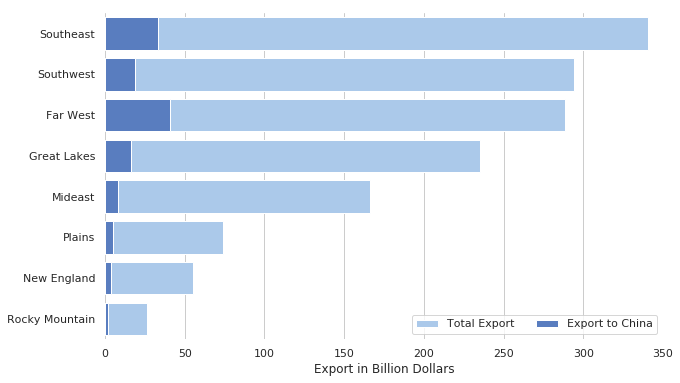

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the total export
sns.set_color_codes("pastel")
sns.barplot(x="Export to World", y="region", data=export_region,
            label="Total Export", color="b")

# Plot the export to China
sns.set_color_codes("muted")
sns.barplot(x="Export to China", y="region", data=export_region,
            label="Export to China", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 350), ylabel="",
       xlabel="Export in Billion Dollars")
sns.despine(left=True, bottom=True)

### Compare the export to different economic entities: China, EU, Japan and NAFTA

In [0]:
# Top 10 states in economic scale by GDP

top10_states = list(gdp_2018.sort_values('gdp', ascending=False).State.iloc[:10])
top10_states


['California',
 'Texas',
 'New York',
 'Florida',
 'Illinois',
 'Pennsylvania',
 'Ohio',
 'New Jersey',
 'Georgia',
 'Massachusetts']

Import the export data in 2018 for all states to 4 major economic entities: China, Japan, EU and NAFTA

In [0]:
export_to_world_2018 = pd.read_csv('DATA_Exports_to_World.csv')[['State', '2018']]
export_to_world_2018.to_csv('Export_to_World_2018.csv')

In [0]:
def read_export_2018(region):
  """
  utility function for reading data and sort rows by state name
  """
  file_name = 'Export_to_' + region +'_2018.csv'
  df = pd.read_csv(file_name)
  df.rename(columns={'2018':(region + '_')}, inplace=True)
  df.sort_values('State', inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df

export_2018 = {}

for region in ['China', 'Japan', 'EU', 'NAFTA', 'World']:
  export_2018[region] = read_export_2018(region)
  
df_export_2018 = pd.concat([export_2018['China'], export_2018['Japan'].Japan_,
                        export_2018['EU'].EU_, export_2018['NAFTA'].NAFTA_,
                           export_2018['World'].World_], axis=1)


#make a copy 
df_export_2018_copy = df_export_2018.copy()

In [0]:
# calculate percentage

for region in ['China_', 'Japan_', 'EU_', 'NAFTA_']:
  name = region[:-1]
  df_export_2018[name] = 100*df_export_2018[region]/df_export_2018['World_'] # convert to percent

df_export_2018['Others'] = 100 - df_export_2018.eval('China + Japan + EU + NAFTA')

df_export_2018 = df_export_2018[['State', 'China', 'Japan', 'EU', 'NAFTA', 'Others']]
df_export_2018.set_index('State', inplace=True)
df_export_2018 = df_export_2018.T

df_export_2018 = np.round(df_export_2018, 2) # round to 2 decimal points
df_export_2018.loc['Others', 'Pennsylvania'] = 100 - df_export_2018['Pennsylvania'].iloc[:-1].sum() # have to manually adjust this state for rounding erros

df_export_2018

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,UNITED STATES,Unallocated,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
China,14.27,21.35,5.33,4.87,9.16,6.94,5.42,8.10,0.10,3.62,7.35,5.51,10.38,5.26,5.09,4.37,5.66,6.87,4.61,7.23,4.78,9.73,6.15,9.96,5.40,5.40,6.93,5.34,8.27,6.96,4.41,30.23,4.22,7.15,0.32,6.75,3.33,21.36,6.24,6.34,6.01,16.27,3.32,7.68,5.26,7.23,1.21,4.01,5.76,0.16,6.63,20.59,5.96,7.19,3.90
Japan,3.85,16.60,3.36,2.59,7.34,5.44,3.62,3.74,0.29,1.77,3.65,11.09,5.35,3.03,5.25,6.73,8.69,3.40,3.70,3.09,9.29,5.48,2.47,6.69,4.45,3.68,3.37,10.41,2.23,4.10,4.02,6.60,2.34,4.90,0.53,3.09,4.85,9.80,5.19,7.02,2.65,4.73,4.59,5.95,3.76,4.51,1.41,5.60,1.27,0.01,2.75,7.84,3.51,3.23,4.61
EU,24.11,20.99,17.64,18.53,17.85,18.19,50.74,26.34,26.19,16.31,21.91,6.27,12.33,17.75,23.37,15.41,18.21,34.73,16.75,13.10,31.23,28.90,12.59,20.43,14.71,15.52,13.63,11.32,9.98,39.08,26.74,8.29,24.55,25.77,3.22,16.13,21.94,9.64,24.08,60.40,21.44,26.07,11.30,19.17,12.58,19.15,12.09,47.14,13.03,2.82,27.32,15.71,27.90,18.49,4.29
NAFTA,31.11,14.25,43.76,32.12,27.18,32.31,16.67,18.54,1.17,12.38,25.00,3.04,28.75,42.53,47.67,45.90,34.82,31.57,18.71,51.92,17.04,20.17,62.29,31.58,28.81,56.25,43.51,43.93,16.05,20.50,28.05,42.02,21.26,31.80,89.30,51.37,39.69,16.48,36.59,7.52,29.62,19.44,64.26,38.87,43.49,33.88,62.11,17.46,45.02,14.87,23.28,14.42,18.71,46.15,19.86
Others,26.67,26.81,29.90,41.89,38.47,37.11,23.55,43.28,72.25,65.92,42.09,74.10,43.19,31.43,18.62,27.59,32.62,23.44,56.23,24.66,37.66,35.72,16.50,31.34,46.62,19.15,32.56,29.00,63.47,29.36,36.78,12.86,47.63,30.39,6.63,22.66,30.19,42.72,27.90,18.71,40.29,33.48,16.52,28.33,34.91,35.24,23.18,25.78,34.92,82.14,40.02,41.44,43.92,24.93,67.34


The 4 categories are based on manifold learning result

In [0]:
cat1 = ['Washington', 'South Carolina', 'Oregon', 'Alabama', 'Kentucky', 'Puerto Rico', 'New Mexico', 'Alaska', 'Connecticut', 'Utah', 'New Hampshire']
cat2 = ['Texas', 'California', 'New York', 'Illinois', 'Georgia', 'Massachusetts', 'Pennsylvania', 'Tennessee', 'North Carolina', 'Minnesota', 'Florida', 'New Jersey', 'Virginia', 'Maryland', 'Colorado']
cat3 = ['Louisiana', 'Nevada', 'Mississippi', 'West Virginia', 'Idaho', 'Delaware', 'Arkansas', 'Maine', 'Vermont', 'Rhode Island', 'Montana', 'Wyoming', 'Hawaii', 'District of Columbia']
cat4 = ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Arizona', 'Missouri', 'Kansas', 'Iowa', 'Nebraska', 'Oklahoma', 'South Dakota', 'North Dakota']

In [0]:
df_export_2018_copy.head()

,State,China_,Japan_,EU_,NAFTA_,World_
0,Alabama,3045648637,821180018,5146457664,6641461199,21349242744
1,Alaska,1019182118,792384838,1001917540,679975655,4773109763
2,Arizona,1193594160,753250696,3949840826,9797826861,22388342080
3,Arkansas,314610271,167547100,1198426018,2076745617,6466443255
4,California,16345090150,13099540659,31841122069,48488959762,178404767473


In [0]:
# some data wrangling to make it compatible for waffle chart

ml_result = []


for cat in [cat1, cat2, cat3, cat4]:
  ml_result.append(df_export_2018_copy[df_export_2018_copy.State.isin(cat)].sum())
  
df_ml = pd.concat(ml_result, axis=1)

df_ml.columns = ['I', 'II', 'III', 'IV']

df_ml = df_ml.iloc[1:, :]

df_ml.index = ['China', 'Japan', 'EU', 'NAFTA', 'Others']

df_ml.iloc[:-1, :] = (df_ml.iloc[:-1, :]/df_ml.iloc[-1, :])*100

df_ml.iloc[-1, :] = 100 - df_ml.iloc[:-1, :].sum()



Waffle plot

In [0]:
pip install pywaffle

  Stored in directory: /root/.cache/pip/wheels/40/41/69/3c2261c863efd83871399be78d57179ff72b4f048cca96de4d
Successfully built pywaffle


Create waffle plot

In [0]:
# Unsuccessful try

# import matplotlib.pyplot as plt
# from pywaffle import Waffle

# fig = plt.figure(FigureClass=Waffle, rows=10, figsize=(9, 9))
# axs = fig.subplots(2, 5)

# for i in range(10):
#   axs[i//5, i%5].plot(df_export_2018['California'])
#   axs[i//5, i%5].set_labels(["{0} ({1}%)".format(n, v) for n, v in df_export_2018['California'].items()])
#   axs[i//5, i%5].set_legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
#   axs[i//5, i%5].set_title(label='California')

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


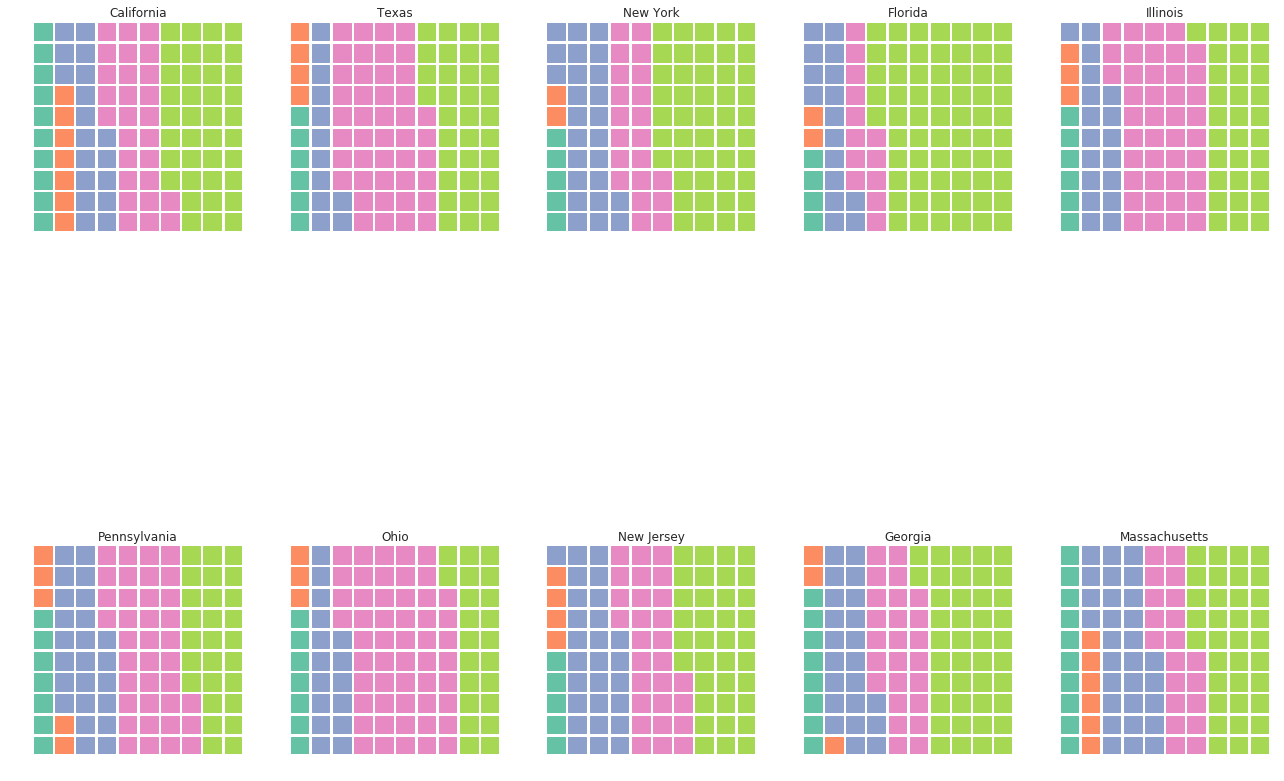

In [0]:
# need to figure out how to reduce the gap between the two rows
import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '251': {
            'values': df_export_2018['California'],
#             'labels': ["{0}".format(n) for n, v in df_export_2018['California'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'California', 'loc': 'center', 'size': 25}
        },
        '252': {
            'values': df_export_2018['Texas'],
#             'labels': ["{0} ({1}%) ".format(n, v) for n, v in df_export_2018['Texas'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Texas', 'loc': 'center', 'size': 25}
        },
        '253': {
            'values': df_export_2018['New York'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['New York'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'New York', 'loc': 'center', 'size': 25}
        },
         '254': {
            'values': df_export_2018['Florida'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Florida'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Florida', 'loc': 'center', 'size': 25}
        },
         '255': {
            'values': df_export_2018['Illinois'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Illinois''].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Illinois', 'loc': 'center', 'size': 25}
        },
         '256': {
            'values': df_export_2018['Pennsylvania'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Pennsylvania'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Pennsylvania', 'loc': 'center', 'size': 25}
        },
         '257': {
            'values': df_export_2018['Ohio'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Ohio'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Ohio', 'loc': 'center', 'size': 25}
        },
         '258': {
            'values': df_export_2018['New Jersey'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['New Jersey'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'New Jersey', 'loc': 'center', 'size': 25}
        },
         '259': {
            'values': df_export_2018['Georgia'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Georgia'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Georgia', 'loc': 'center', 'size': 25}
        },
         '250': {
            'values': df_export_2018['Massachusetts'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Massachusetts'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Massachusetts', 'loc': 'center', 'size': 25}
        },        
    },
    rows=10,
    figsize=(18, 18)  # figsize is a parameter of plt.figure
)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


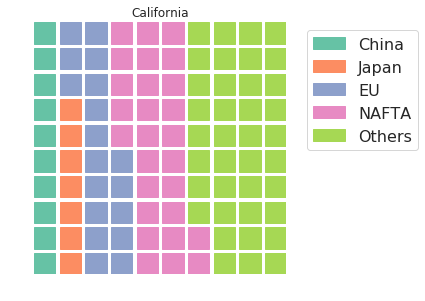

In [0]:
# this is just to get the legend

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df_export_2018['California'],
            'labels': ["{0}".format(n) for n, v in df_export_2018['California'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':16},
            'title': {'label': 'California', 'loc': 'center'}
        },
    },
    rows=10,
    figsize=(6, 6)  # figsize is a parameter of plt.figure
)

Waffle chart for manifold learning result

In [0]:
df_ml

,I,II,III,IV
China,14.6358,6.30619,5.45549,5.71387
Japan,6.27466,4.49296,3.50639,4.00891
EU,27.6478,18.3911,16.8876,16.4181
NAFTA,19.2351,32.7923,21.8435,51.9255
Others,32.2066,38.0174,52.307,21.9336


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


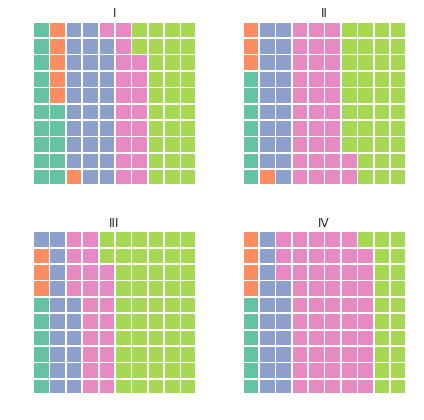

In [0]:
# waffle chart for the 4 categories

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '221': {
            'values': df_ml['I'],
#             'labels': ["{0}".format(n) for n, v in df_ml['I'].items()],
#             'legend': {'loc': 'center left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'I', 'loc': 'center'}
        },
        '222': {
            'values': df_ml['II'],
#             'labels': ["{0} ({1}%) ".format(n, v) for n, v in df_export_2018['Texas'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'II', 'loc': 'center'}
        },
        '223': {
            'values': df_ml['III'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['New York'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'III', 'loc': 'center'}
        },
         '224': {
            'values': df_ml['IV'],
#             'labels': ["{0} ({1}%)".format(n, v) for n, v in df_export_2018['Florida'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'IV', 'loc': 'center'}
        },       
    },
    rows=10,
    figsize=(6,6)  # figsize is a parameter of plt.figure
)

### Scatter bubble plot of export vs. import for all states

In [0]:
df_trade_china_2018 = df_trade_china_copy[df_trade_china_copy.Year == 2018]
df_trade_china_2018 = pd.merge(df_trade_china_2018, gdp_2018[['State', 'region', 'gdp']], on='State', how='left')
df_trade_china_2018 = df_trade_china_2018.dropna() # drop first row (US national data)
df_trade_china_2018['gdp'] = (df_trade_china_2018.gdp/1000).astype(int) # convert to billion dollars
df_trade_china_2018.rename(columns={'gdp':'gdp, in billion dollars'}, inplace=True)

df_trade_china_2018.sort_values('gdp, in billion dollars', ascending = False).State.head(10)

2        California
1             Texas
8          New York
19          Florida
9          Illinois
14     Pennsylvania
6              Ohio
22       New Jersey
12          Georgia
13    Massachusetts
Name: State, dtype: object

Text(0, 0.5, 'Export, in Million Dollars')

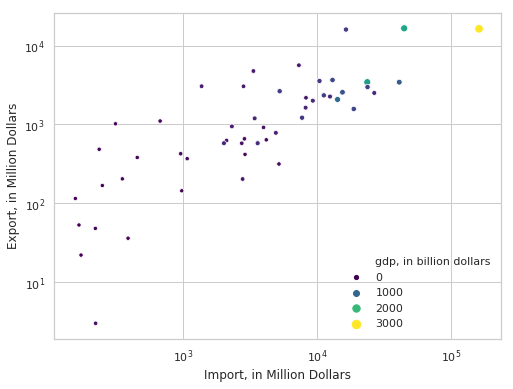

In [0]:
cmap = plt.get_cmap('viridis')

fig, ax = plt.subplots(figsize=(8, 6))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x="Import", y="Export",
                      hue="gdp, in billion dollars", size="gdp, in billion dollars",
                     data=df_trade_china_2018, ax=ax, palette=cmap)
ax.legend(loc='lower right', frameon=False)
ax.set_xlabel('Import, in Million Dollars')
ax.set_ylabel('Export, in Million Dollars')

In [0]:
US_export_perc_2018 = df_export_2018.T.reset_index().drop('China', axis = 1)


trade_china_2018 = trade_china.query('Year == 2018') 
trade_world_2018 = trade_world.query('Year == 2018') 
export_percent_2018= (trade_china_2018.set_index(['State', 'Year'])['export_normalized'] \
                  / trade_world_2018.set_index(['State', 'Year'])['export_normalized']).reset_index() 
export_percent_2018.rename(columns = {'export_normalized': 'export_normalized_perc'}, inplace = True)
 


df_ = pd.merge(trade_china_2018, election, how = 'left', on = 'State')
df_ = pd.merge(df_, export_percent_2018, how = 'left', on = 'State')
df_ = pd.merge(df_, gdp_2018, how = 'left', on = 'State')
df_ = df_.drop(['Year_x', 'export', 'import', 'Year_y', ], axis = 1)
df_ = df_[df_.State !='UNITED STATES']


df = pd.merge(df_, US_export_perc_2018, how = 'left', on = 'State')
df.head()

,State,export_normalized,import_normalized,Party,export_normalized_perc,Q1,Q2,Q3,Q4,region,gdp,Japan,EU,NAFTA,Others
0,Texas,16586.874848,44494.985568,Republican,0.052582,1724996.0,1766263.0,1793342.0,1818585.0,Southwest,1775796.50,3.76,12.58,43.49,34.91
1,California,16345.090150,161186.708150,Democratic,0.091618,2899362.0,2967681.0,2987090.0,3018337.0,Far West,2968117.50,7.34,17.85,27.18,38.47
2,Washington,16001.404764,16358.881032,Democratic,0.205938,546347.0,560182.0,569449.0,576624.0,Far West,563150.50,7.84,15.71,14.42,41.44
3,South Carolina,5636.999846,7280.194835,Republican,0.162745,225947.0,229197.0,231906.0,234367.0,Southeast,230354.25,4.73,26.07,19.44,33.48
4,Oregon,4761.730851,3332.180375,Democratic,0.213601,233601.0,237318.0,240731.0,243085.0,Far West,238683.75,9.80,9.64,16.48,42.72


In [0]:
df.to_csv('trade_state_2018.csv')
